# Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

1. To predict whether a liability customer will buy a personal loan or not.
2. Which variables are most significant.
3. Which segment of customers should be targeted more.

# Dataset

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### Import necessary libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)

<IPython.core.display.Javascript object>

### Read the dataset

In [2]:
Loan_costumers = pd.read_csv("Loan_Modelling.csv")

<IPython.core.display.Javascript object>

In [3]:
# copying data to another varaible to avoid any changes to original data
data = Loan_costumers.copy()
data1 = data.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset.

In [4]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [5]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


<IPython.core.display.Javascript object>

### Understand the shape of the dataset.

In [6]:
data.shape

(5000, 14)

<IPython.core.display.Javascript object>

* Dataset has 5000 rows and 14 columns

### Let's check the duplicate data. And if any, we should remove it.

In [7]:
data[data.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

* There are NO duplicate values in the dataset

### Check the data types of the columns for the dataset.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

### Insights:

- All of the data-types are either **int64** or **float64**.


### Check for missing values

In [9]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing values in the data.

### Summary of the dataset

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<IPython.core.display.Javascript object>

* Mortgage variable seems to be left-skewed.
* There is a wrong input data on Experience column, so min value is -3, could be min 0 for this column.
* There are some customers who don't have Securities_Account, CD_Account and CreditCard.
* There are some customers who don't have Online account. 
* Family and Education could be count for categorical variable.
* Personal_Loan, Securities_Account, CD_Account, Online, CreditCard columns would also be count categorical.

In [11]:
cat_columns = ["Family", "Education"]
for i in cat_columns:
    print(data[i].value_counts())
    print("*" * 50)

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
**************************************************
1    2096
3    1501
2    1403
Name: Education, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

In [12]:
cat1_columns = [
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
]
for i in cat1_columns:
    print(data[i].value_counts())
    print("*" * 50)

0    4520
1     480
Name: Personal_Loan, dtype: int64
**************************************************
0    4478
1     522
Name: Securities_Account, dtype: int64
**************************************************
0    4698
1     302
Name: CD_Account, dtype: int64
**************************************************
1    2984
0    2016
Name: Online, dtype: int64
**************************************************
0    3530
1    1470
Name: CreditCard, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

* Family, Education, Personal_Loan, Securities_Account, CD_Account, Online and CreditCard data set which we can count as categorical.
* We would also convert Mortgage into categorical if costumer have Mortgage account and Mortgage balance high or low.
* Data set looks good but we will take care of ZipCode column, because zipcode is no make sense as category for marketing. 

### Take care of the Mortgage data

In [13]:
data2 = data1.copy()

<IPython.core.display.Javascript object>

In [14]:
data2["Mortgage"] = data2["Mortgage"].astype("str")

<IPython.core.display.Javascript object>

In [15]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   object 
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 547.0+ KB


<IPython.core.display.Javascript object>

In [16]:
Mortgage_list = []

<IPython.core.display.Javascript object>

In [17]:
def conver_mortgage(x):

    # we define 5 type of mortgage loan

    data = int(x)

    if data == 0:

        x = "No_Mortgage"
        Mortgage_list.append(x)

    elif data <= 100:

        x = "Small_Loan"
        Mortgage_list.append(x)

    elif data > 100 and data <= 300:

        x = "Medium_Loan"
        Mortgage_list.append(x)

    elif data > 300 and data <= 500:

        x = "High_Loan"
        Mortgage_list.append(x)

    elif data > 500:

        x = "Very_High_Loan"
        Mortgage_list.append(x)

<IPython.core.display.Javascript object>

In [18]:
# we define 5 type of mortgage loan
data2.Mortgage.apply(conver_mortgage)
data2.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [19]:
Mortgage_list


['No_Mortgage',
 'No_Mortgage',
 'No_Mortgage',
 'No_Mortgage',
 'No_Mortgage',
 'Medium_Loan',
 'No_Mortgage',
 'No_Mortgage',
 'Medium_Loan',
 'No_Mortgage',
 'No_Mortgage',
 'No_Mortgage',
 'No_Mortgage',
 'No_Mortgage',
 'No_Mortgage',
 'No_Mortgage',
 'Medium_Loan',
 'No_Mortgage',
 'No_Mortgage',
 'No_Mortgage',
 'Medium_Loan',
 'No_Mortgage',
 'Medium_Loan',
 'Medium_Loan',
 'Medium_Loan',
 'Small_Loan',
 'No_Mortgage',
 'No_Mortgage',
 'No_Mortgage',
 'No_Mortgage',
 'Medium_Loan',
 'No_Mortgage',
 'Medium_Loan',
 'No_Mortgage',
 'No_Mortgage',
 'No_Mortgage',
 'No_Mortgage',
 'Medium_Loan',
 'No_Mortgage',
 'Medium_Loan',
 'No_Mortgage',
 'No_Mortgage',
 'High_Loan',
 'No_Mortgage',
 'No_Mortgage',
 'No_Mortgage',
 'Medium_Loan',
 'Medium_Loan',
 'No_Mortgage',
 'No_Mortgage',
 'No_Mortgage',
 'No_Mortgage',
 'Medium_Loan',
 'Medium_Loan',
 'No_Mortgage',
 'No_Mortgage',
 'No_Mortgage',
 'No_Mortgage',
 'No_Mortgage',
 'High_Loan',
 'No_Mortgage',
 'Medium_Loan',
 'No_Mortgage

<IPython.core.display.Javascript object>

In [20]:
len(Mortgage_list)

5000

<IPython.core.display.Javascript object>

In [21]:
data2.Mortgage = Mortgage_list
data2.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,No_Mortgage,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,No_Mortgage,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,No_Mortgage,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,No_Mortgage,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,No_Mortgage,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,Medium_Loan,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,No_Mortgage,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,No_Mortgage,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,Medium_Loan,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,No_Mortgage,1,0,0,0,0


<IPython.core.display.Javascript object>

In [22]:
replaceStruct = {
    "Mortgage": {
        "No_Mortgage": "0",
        "Small_Loan": "1",
        "Medium_Loan": "2",
        "High_Loan": "3",
        "Very_High_Loan": "4",
    }
}

<IPython.core.display.Javascript object>

In [23]:
data2 = data2.replace(replaceStruct)
data2.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [24]:
data2.Mortgage.dtype

dtype('O')

<IPython.core.display.Javascript object>

In [25]:
data2.Mortgage = data2.Mortgage.astype("int64")
data2.Mortgage.dtype

dtype('int64')

<IPython.core.display.Javascript object>

### Take care of the Zipcode data

In [26]:
# !pip install uszipcode
# !pip install --upgrade uszipcode
# !python  --version

<IPython.core.display.Javascript object>

In [27]:
from uszipcode import SearchEngine

data3 = data2.copy()

data3.ZIPCode.isnull().sum()

0

<IPython.core.display.Javascript object>

In [28]:
data3.ZIPCode.dtype


dtype('int64')

<IPython.core.display.Javascript object>

In [29]:
data3.ZIPCode.median()

93437.0

<IPython.core.display.Javascript object>

In [30]:
# the zipcodes below are not in  uszipcode DB as state value. we convert it them with median value
zipcodes_not_in_uszipcode = [92717, 93077, 92634, 96651]

<IPython.core.display.Javascript object>

In [31]:
# zipcode.major_city
# zipcode.state_abbr

# to look what state is mostly in our dataset. so all zipcodes are in CA. so we will look at city then.
    
list1= []

a=0
    
for zips in data3.ZIPCode:

        
    if zips in zipcodes_not_in_uszipcode :
        
        zips= 93437
        
        search = SearchEngine()
        
        state = search.by_zipcode(zips).state_abbr
        
        list1.append(state)
            
        print(a,". ",state)
        
        a+=1
    
    else :
        
        search = SearchEngine()
        
        state = search.by_zipcode(zips).state_abbr
        
        list1.append(state)
            
        print(a,". ",state)
        
        a+=1
            


0 .  CA
1 .  CA
2 .  CA
3 .  CA
4 .  CA
5 .  CA
6 .  CA
7 .  CA
8 .  CA
9 .  CA
10 .  CA
11 .  CA
12 .  CA
13 .  CA
14 .  CA
15 .  CA
16 .  CA
17 .  CA
18 .  CA
19 .  CA
20 .  CA
21 .  CA
22 .  CA
23 .  CA
24 .  CA
25 .  CA
26 .  CA
27 .  CA
28 .  CA
29 .  CA
30 .  CA
31 .  CA
32 .  CA
33 .  CA
34 .  CA
35 .  CA
36 .  CA
37 .  CA
38 .  CA
39 .  CA
40 .  CA
41 .  CA
42 .  CA
43 .  CA
44 .  CA
45 .  CA
46 .  CA
47 .  CA
48 .  CA
49 .  CA
50 .  CA
51 .  CA
52 .  CA
53 .  CA
54 .  CA
55 .  CA
56 .  CA
57 .  CA
58 .  CA
59 .  CA
60 .  CA
61 .  CA
62 .  CA
63 .  CA
64 .  CA
65 .  CA
66 .  CA
67 .  CA
68 .  CA
69 .  CA
70 .  CA
71 .  CA
72 .  CA
73 .  CA
74 .  CA
75 .  CA
76 .  CA
77 .  CA
78 .  CA
79 .  CA
80 .  CA
81 .  CA
82 .  CA
83 .  CA
84 .  CA
85 .  CA
86 .  CA
87 .  CA
88 .  CA
89 .  CA
90 .  CA
91 .  CA
92 .  CA
93 .  CA
94 .  CA
95 .  CA
96 .  CA
97 .  CA
98 .  CA
99 .  CA
100 .  CA
101 .  CA
102 .  CA
103 .  CA
104 .  CA
105 .  CA
106 .  CA
107 .  CA
108 .  CA
109 .  CA
110 .  CA


839 .  CA
840 .  CA
841 .  CA
842 .  CA
843 .  CA
844 .  CA
845 .  CA
846 .  CA
847 .  CA
848 .  CA
849 .  CA
850 .  CA
851 .  CA
852 .  CA
853 .  CA
854 .  CA
855 .  CA
856 .  CA
857 .  CA
858 .  CA
859 .  CA
860 .  CA
861 .  CA
862 .  CA
863 .  CA
864 .  CA
865 .  CA
866 .  CA
867 .  CA
868 .  CA
869 .  CA
870 .  CA
871 .  CA
872 .  CA
873 .  CA
874 .  CA
875 .  CA
876 .  CA
877 .  CA
878 .  CA
879 .  CA
880 .  CA
881 .  CA
882 .  CA
883 .  CA
884 .  CA
885 .  CA
886 .  CA
887 .  CA
888 .  CA
889 .  CA
890 .  CA
891 .  CA
892 .  CA
893 .  CA
894 .  CA
895 .  CA
896 .  CA
897 .  CA
898 .  CA
899 .  CA
900 .  CA
901 .  CA
902 .  CA
903 .  CA
904 .  CA
905 .  CA
906 .  CA
907 .  CA
908 .  CA
909 .  CA
910 .  CA
911 .  CA
912 .  CA
913 .  CA
914 .  CA
915 .  CA
916 .  CA
917 .  CA
918 .  CA
919 .  CA
920 .  CA
921 .  CA
922 .  CA
923 .  CA
924 .  CA
925 .  CA
926 .  CA
927 .  CA
928 .  CA
929 .  CA
930 .  CA
931 .  CA
932 .  CA
933 .  CA
934 .  CA
935 .  CA
936 .  CA
937 .  CA
938 .  CA


1606 .  CA
1607 .  CA
1608 .  CA
1609 .  CA
1610 .  CA
1611 .  CA
1612 .  CA
1613 .  CA
1614 .  CA
1615 .  CA
1616 .  CA
1617 .  CA
1618 .  CA
1619 .  CA
1620 .  CA
1621 .  CA
1622 .  CA
1623 .  CA
1624 .  CA
1625 .  CA
1626 .  CA
1627 .  CA
1628 .  CA
1629 .  CA
1630 .  CA
1631 .  CA
1632 .  CA
1633 .  CA
1634 .  CA
1635 .  CA
1636 .  CA
1637 .  CA
1638 .  CA
1639 .  CA
1640 .  CA
1641 .  CA
1642 .  CA
1643 .  CA
1644 .  CA
1645 .  CA
1646 .  CA
1647 .  CA
1648 .  CA
1649 .  CA
1650 .  CA
1651 .  CA
1652 .  CA
1653 .  CA
1654 .  CA
1655 .  CA
1656 .  CA
1657 .  CA
1658 .  CA
1659 .  CA
1660 .  CA
1661 .  CA
1662 .  CA
1663 .  CA
1664 .  CA
1665 .  CA
1666 .  CA
1667 .  CA
1668 .  CA
1669 .  CA
1670 .  CA
1671 .  CA
1672 .  CA
1673 .  CA
1674 .  CA
1675 .  CA
1676 .  CA
1677 .  CA
1678 .  CA
1679 .  CA
1680 .  CA
1681 .  CA
1682 .  CA
1683 .  CA
1684 .  CA
1685 .  CA
1686 .  CA
1687 .  CA
1688 .  CA
1689 .  CA
1690 .  CA
1691 .  CA
1692 .  CA
1693 .  CA
1694 .  CA
1695 .  CA
1696 .  CA

2376 .  CA
2377 .  CA
2378 .  CA
2379 .  CA
2380 .  CA
2381 .  CA
2382 .  CA
2383 .  CA
2384 .  CA
2385 .  CA
2386 .  CA
2387 .  CA
2388 .  CA
2389 .  CA
2390 .  CA
2391 .  CA
2392 .  CA
2393 .  CA
2394 .  CA
2395 .  CA
2396 .  CA
2397 .  CA
2398 .  CA
2399 .  CA
2400 .  CA
2401 .  CA
2402 .  CA
2403 .  CA
2404 .  CA
2405 .  CA
2406 .  CA
2407 .  CA
2408 .  CA
2409 .  CA
2410 .  CA
2411 .  CA
2412 .  CA
2413 .  CA
2414 .  CA
2415 .  CA
2416 .  CA
2417 .  CA
2418 .  CA
2419 .  CA
2420 .  CA
2421 .  CA
2422 .  CA
2423 .  CA
2424 .  CA
2425 .  CA
2426 .  CA
2427 .  CA
2428 .  CA
2429 .  CA
2430 .  CA
2431 .  CA
2432 .  CA
2433 .  CA
2434 .  CA
2435 .  CA
2436 .  CA
2437 .  CA
2438 .  CA
2439 .  CA
2440 .  CA
2441 .  CA
2442 .  CA
2443 .  CA
2444 .  CA
2445 .  CA
2446 .  CA
2447 .  CA
2448 .  CA
2449 .  CA
2450 .  CA
2451 .  CA
2452 .  CA
2453 .  CA
2454 .  CA
2455 .  CA
2456 .  CA
2457 .  CA
2458 .  CA
2459 .  CA
2460 .  CA
2461 .  CA
2462 .  CA
2463 .  CA
2464 .  CA
2465 .  CA
2466 .  CA

3136 .  CA
3137 .  CA
3138 .  CA
3139 .  CA
3140 .  CA
3141 .  CA
3142 .  CA
3143 .  CA
3144 .  CA
3145 .  CA
3146 .  CA
3147 .  CA
3148 .  CA
3149 .  CA
3150 .  CA
3151 .  CA
3152 .  CA
3153 .  CA
3154 .  CA
3155 .  CA
3156 .  CA
3157 .  CA
3158 .  CA
3159 .  CA
3160 .  CA
3161 .  CA
3162 .  CA
3163 .  CA
3164 .  CA
3165 .  CA
3166 .  CA
3167 .  CA
3168 .  CA
3169 .  CA
3170 .  CA
3171 .  CA
3172 .  CA
3173 .  CA
3174 .  CA
3175 .  CA
3176 .  CA
3177 .  CA
3178 .  CA
3179 .  CA
3180 .  CA
3181 .  CA
3182 .  CA
3183 .  CA
3184 .  CA
3185 .  CA
3186 .  CA
3187 .  CA
3188 .  CA
3189 .  CA
3190 .  CA
3191 .  CA
3192 .  CA
3193 .  CA
3194 .  CA
3195 .  CA
3196 .  CA
3197 .  CA
3198 .  CA
3199 .  CA
3200 .  CA
3201 .  CA
3202 .  CA
3203 .  CA
3204 .  CA
3205 .  CA
3206 .  CA
3207 .  CA
3208 .  CA
3209 .  CA
3210 .  CA
3211 .  CA
3212 .  CA
3213 .  CA
3214 .  CA
3215 .  CA
3216 .  CA
3217 .  CA
3218 .  CA
3219 .  CA
3220 .  CA
3221 .  CA
3222 .  CA
3223 .  CA
3224 .  CA
3225 .  CA
3226 .  CA

3903 .  CA
3904 .  CA
3905 .  CA
3906 .  CA
3907 .  CA
3908 .  CA
3909 .  CA
3910 .  CA
3911 .  CA
3912 .  CA
3913 .  CA
3914 .  CA
3915 .  CA
3916 .  CA
3917 .  CA
3918 .  CA
3919 .  CA
3920 .  CA
3921 .  CA
3922 .  CA
3923 .  CA
3924 .  CA
3925 .  CA
3926 .  CA
3927 .  CA
3928 .  CA
3929 .  CA
3930 .  CA
3931 .  CA
3932 .  CA
3933 .  CA
3934 .  CA
3935 .  CA
3936 .  CA
3937 .  CA
3938 .  CA
3939 .  CA
3940 .  CA
3941 .  CA
3942 .  CA
3943 .  CA
3944 .  CA
3945 .  CA
3946 .  CA
3947 .  CA
3948 .  CA
3949 .  CA
3950 .  CA
3951 .  CA
3952 .  CA
3953 .  CA
3954 .  CA
3955 .  CA
3956 .  CA
3957 .  CA
3958 .  CA
3959 .  CA
3960 .  CA
3961 .  CA
3962 .  CA
3963 .  CA
3964 .  CA
3965 .  CA
3966 .  CA
3967 .  CA
3968 .  CA
3969 .  CA
3970 .  CA
3971 .  CA
3972 .  CA
3973 .  CA
3974 .  CA
3975 .  CA
3976 .  CA
3977 .  CA
3978 .  CA
3979 .  CA
3980 .  CA
3981 .  CA
3982 .  CA
3983 .  CA
3984 .  CA
3985 .  CA
3986 .  CA
3987 .  CA
3988 .  CA
3989 .  CA
3990 .  CA
3991 .  CA
3992 .  CA
3993 .  CA

4666 .  CA
4667 .  CA
4668 .  CA
4669 .  CA
4670 .  CA
4671 .  CA
4672 .  CA
4673 .  CA
4674 .  CA
4675 .  CA
4676 .  CA
4677 .  CA
4678 .  CA
4679 .  CA
4680 .  CA
4681 .  CA
4682 .  CA
4683 .  CA
4684 .  CA
4685 .  CA
4686 .  CA
4687 .  CA
4688 .  CA
4689 .  CA
4690 .  CA
4691 .  CA
4692 .  CA
4693 .  CA
4694 .  CA
4695 .  CA
4696 .  CA
4697 .  CA
4698 .  CA
4699 .  CA
4700 .  CA
4701 .  CA
4702 .  CA
4703 .  CA
4704 .  CA
4705 .  CA
4706 .  CA
4707 .  CA
4708 .  CA
4709 .  CA
4710 .  CA
4711 .  CA
4712 .  CA
4713 .  CA
4714 .  CA
4715 .  CA
4716 .  CA
4717 .  CA
4718 .  CA
4719 .  CA
4720 .  CA
4721 .  CA
4722 .  CA
4723 .  CA
4724 .  CA
4725 .  CA
4726 .  CA
4727 .  CA
4728 .  CA
4729 .  CA
4730 .  CA
4731 .  CA
4732 .  CA
4733 .  CA
4734 .  CA
4735 .  CA
4736 .  CA
4737 .  CA
4738 .  CA
4739 .  CA
4740 .  CA
4741 .  CA
4742 .  CA
4743 .  CA
4744 .  CA
4745 .  CA
4746 .  CA
4747 .  CA
4748 .  CA
4749 .  CA
4750 .  CA
4751 .  CA
4752 .  CA
4753 .  CA
4754 .  CA
4755 .  CA
4756 .  CA

<IPython.core.display.Javascript object>

In [32]:
data3 = data2.copy()

<IPython.core.display.Javascript object>

In [33]:
# zipcode.major_city
# zipcode.state_abbr
    
list1= []
    
for zips in data3.ZIPCode:

            
        search = SearchEngine(simple_zipcode=True)
        
        state = search.by_zipcode(zips).major_city
        
        list1.append(state)
            
        print(state)
            


Pasadena
Los Angeles
Berkeley
San Francisco
Northridge
San Diego
Claremont
Monterey
Los Angeles
Ojai
Berkeley
Redondo Beach
Santa Barbara
Belvedere Tiburon
Glendora
Santa Clara
Capitola
Stanford
Studio City
Berkeley
Daly City
Los Angeles
Redondo Beach
Newbury Park
Arcata
Stanford
Santa Cruz
Los Angeles
Fremont
San Francisco
Santa Barbara
San Francisco
Richmond
Northridge
Mountain View
Huntington Beach
Berkeley
Sacramento
San Francisco
San Francisco
San Clemente
San Francisco
Los Angeles
Davis
Redwood City
Berkeley
Cupertino
Santa Clarita
Roseville
Redlands
La Jolla
Berkeley
Brisbane
El Segundo
Sacramento
Los Altos
Brisbane
Davis
Redwood City
Newbury Park
Santa Monica
San Luis Obispo
Los Angeles
Pleasant Hill
Los Angeles
Thousand Oaks
Rancho Cordova
San Jose
San Luis Obispo
Los Angeles
Reseda
Salinas
Cardiff By The Sea
Oakland
Oakland
San Rafael
Newbury Park
Banning
Bakersfield
Berkeley
San Jose
Oakland
Riverside
Stanford
Rancho Cucamonga
Brisbane
Alameda
Stanford
San Francisco
Palo Alt

Oceanside
Oakland
San Francisco
San Francisco
Stanford
Santa Clarita
Riverside
San Diego
Fallbrook
Alameda
Goleta
Berkeley
Agoura Hills
Anaheim
Sanger
Novato
Simi Valley
Santa Clara
Sunland
Irvine
Riverside
Newport Beach
Redwood City
Elk Grove
Hayward
San Marcos
San Luis Rey
Palo Alto
San Diego
Berkeley
Los Angeles
Berkeley
Monterey
Walnut Creek
Mountain View
Venice
Moss Landing
Los Angeles
Seal Beach
La Jolla
Trinity Center
Torrance
Richmond
Davis
Ridgecrest
Hayward
Hayward
Hermosa Beach
San Bernardino
San Bruno
Cypress
Larkspur
San Jose
Mission Viejo
San Diego
San Marcos
Riverside
Huntington Beach
Redlands
Hayward
San Diego
Berkeley
El Dorado Hills
Albany
San Diego
Fremont
Berkeley
Stanford
Santa Clara
Concord
Poway
San Jose
Sacramento
San Diego
Menlo Park
Davis
Berkeley
San Diego
Sacramento
Loma Linda
Menlo Park
Los Angeles
South San Francisco
La Jolla
Oakland
Berkeley
Walnut Creek
Carpinteria
San Diego
Trinity Center
Los Angeles
Seal Beach
Oceanside
Davis
Menlo Park
San Jose
Davis


Fallbrook
San Diego
Los Angeles
San Diego
La Jolla
San Francisco
Stanford
La Jolla
San Francisco
La Jolla
Fallbrook
San Luis Obispo
Torrance
San Francisco
Mountain View
Davis
Los Angeles
Sacramento
Sacramento
Los Angeles
Newbury Park
Los Angeles
Stanford
Irvine
Crestline
Livermore
Bakersfield
Fallbrook
San Luis Obispo
El Segundo
San Diego
Torrance
Ridgecrest
Manhattan Beach
Fallbrook
Emeryville
Ojai
Stanford
San Marcos
Livermore
Stanford
Belvedere Tiburon
Santa Barbara
San Mateo
Calabasas
Berkeley
Los Angeles
Mountain View
La Jolla
Oakland
Los Angeles
Los Angeles
Hayward
Santa Barbara
Monrovia
Santa Cruz
San Luis Obispo
San Marcos
Pasadena
Los Gatos
San Diego
Sacramento
Northridge
San Diego
Los Altos
San Jose
Rio Vista
Los Angeles
San Diego
Sacramento
Pasadena
Valencia
San Marcos
Hacienda Heights
Torrance
Santa Barbara
Moss Landing
San Diego
Palo Alto
Costa Mesa
None
Stanford
Valencia
Huntington Beach
Fremont
La Jolla
Sacramento
Roseville
La Jolla
Oakland
Saratoga
North Hollywood
Santa

Los Angeles
San Francisco
Fallbrook
Emeryville
Los Angeles
Emeryville
Venice
Newport Beach
San Diego
Daly City
Oakland
Claremont
Oakland
Ridgecrest
Ojai
Mountain View
Belvedere Tiburon
Poway
Ben Lomond
Santa Barbara
Santa Cruz
Bakersfield
Rohnert Park
Berkeley
Los Angeles
Bodega Bay
Chatsworth
Campbell
Davis
Pleasanton
Brisbane
Mountain View
Cupertino
Monterey
Palo Alto
Carlsbad
Arcadia
Pomona
La Jolla
West Sacramento
Berkeley
Irvine
Rohnert Park
San Francisco
Los Angeles
Fallbrook
Berkeley
Hayward
Berkeley
Pomona
Los Angeles
Sacramento
Irvine
San Francisco
Brisbane
Redwood City
Santa Cruz
Cupertino
Manhattan Beach
Santa Clara
El Segundo
Santa Clarita
Sacramento
Berkeley
Beverly Hills
Capitola
Pleasanton
Loma Linda
Berkeley
San Francisco
Stockton
Lake Forest
Northridge
Goleta
Arcadia
San Gabriel
San Francisco
Clovis
Los Angeles
Davis
Livermore
Canoga Park
Novato
Cupertino
Reseda
San Ramon
Riverside
San Francisco
San Juan Capistrano
None
Davis
San Diego
Santa Clarita
San Diego
Berkeley


Irvine
Los Angeles
Newbury Park
Hayward
West Covina
Los Angeles
Castro Valley
Santa Clara
Riverside
Tustin
Fremont
San Francisco
Santa Ana
San Diego
Menlo Park
Palo Alto
Fresno
Santa Cruz
Moss Landing
Modesto
Claremont
Ridgecrest
San Diego
Palo Alto
Santa Monica
Santa Clara
Pasadena
Claremont
Stanford
Chula Vista
Los Altos
Davis
San Jose
Los Angeles
San Francisco
Rancho Palos Verdes
San Francisco
Stanford
Costa Mesa
Huntington Beach
Berkeley
Los Angeles
Fullerton
Palo Alto
Los Altos
San Francisco
San Francisco
San Jose
Claremont
Los Angeles
Berkeley
Berkeley
Emeryville
San Francisco
Chula Vista
Rancho Cordova
Palo Alto
Berkeley
Carlsbad
Northridge
Arcadia
Sacramento
El Segundo
San Diego
Sacramento
Palo Alto
Hayward
Loma Linda
Garden Grove
San Jose
Mountain View
Lomita
San Juan Capistrano
Reseda
Santa Barbara
Brisbane
Davis
Los Angeles
Los Angeles
Mountain View
Ridgecrest
San Diego
Arcata
San Diego
San Diego
San Ysidro
Laguna Niguel
Los Angeles
San Bernardino
Pasadena
San Luis Obispo
Lo

Bakersfield
Monterey
San Francisco
Walnut Creek
El Segundo
Northridge
La Mirada
El Segundo
Walnut Creek
Menlo Park
Merced
Poway
South San Francisco
La Jolla
San Diego
Emeryville
Los Angeles
Los Angeles
Santa Barbara
Sacramento
Davis
Torrance
Oakland
Lomita
Palo Alto
Venice
San Diego
San Dimas
West Sacramento
Aptos
Stanford
Calabasas
Bodega Bay
Los Angeles
Davis
Studio City
Chico
San Diego
Fresno
Pleasanton
Los Angeles
Thousand Oaks
Newbury Park
Brea
Goleta
Berkeley
Palo Alto
San Luis Obispo
San Francisco
Placentia
Oakland
Ridgecrest
Santa Barbara
Alameda
Los Angeles
Hopland
Los Angeles
Pasadena
Fallbrook
Ukiah
Carpinteria
Santa Barbara
Menlo Park
La Mesa
Santa Clara
Palo Alto
Santa Barbara
Stanford
Santa Cruz
Davis
Novato
Los Angeles
Stanford
Northridge
Redondo Beach
Palo Alto
Crestline
Camarillo
Orange
Mission Viejo
Pleasanton
Ridgecrest
Rancho Cordova
Los Angeles
San Diego
Sacramento
Northridge
Irvine
Cupertino
Rio Vista
Bakersfield
Ridgecrest
San Juan Capistrano
Irvine
Alameda
Haywa

Glendora
Santa Ynez
La Jolla
Santa Clara
San Diego
Los Angeles
Poway
Davis
San Francisco
West Sacramento
San Diego
Northridge
San Francisco
Newbury Park
Boulder Creek
Los Angeles
Cypress
Menlo Park
Thousand Oaks
Laguna Niguel
Costa Mesa
Campbell
Irvine
Los Angeles
San Diego
Los Altos
Palo Alto
Oak View
Venice
Carlsbad
Davis
Hopland
Pasadena
San Francisco
Seal Beach
San Francisco
Anaheim
Hawthorne
San Francisco
Sacramento
Moss Landing
Carlsbad
Cypress
Los Angeles
Berkeley
Claremont
San Marcos
Los Angeles
Sacramento
Berkeley
San Francisco
Novato
Moraga
Stanford
Monterey
Santa Barbara
San Diego
Stanford
Davis
Sunnyvale
Davis
Berkeley
Palo Alto
San Francisco
San Jose
Irvine
San Diego
Orange
Menlo Park
Santa Barbara
Laguna Niguel
Pleasanton
Los Angeles
La Jolla
Sacramento
Newbury Park
Monrovia
Santa Clara
Santa Clara
Menlo Park
San Gabriel
La Mirada
Goleta
Santa Cruz
Los Angeles
Torrance
San Diego
Escondido
Pomona
Redwood City
San Jose
Fairfield
Signal Hill
Carson
San Diego
Danville
Chatswo

<IPython.core.display.Javascript object>

In [34]:
data3.ZIPCode = list1

<IPython.core.display.Javascript object>

In [35]:
data3.ZIPCode.value_counts()

Los Angeles      375
San Diego        269
San Francisco    257
Berkeley         241
Sacramento       148
                ... 
Sierra Madre       1
Ladera Ranch       1
Tahoe City         1
Stinson Beach      1
Sausalito          1
Name: ZIPCode, Length: 244, dtype: int64

<IPython.core.display.Javascript object>

In [36]:
data3.ZIPCode.isnull().sum()

34

<IPython.core.display.Javascript object>

In [37]:
for i in range(data3.shape[0]):  # iterate over all rows in data

    txt = data3.ZIPCode.values[i]

    if txt == None:

        print(i, ".", txt)

106 . None
172 . None
184 . None
321 . None
366 . None
384 . None
468 . None
476 . None
630 . None
672 . None
695 . None
721 . None
780 . None
1099 . None
1189 . None
1426 . None
1483 . None
1653 . None
1752 . None
1844 . None
2049 . None
2211 . None
2218 . None
2428 . None
2486 . None
2731 . None
2957 . None
3525 . None
3887 . None
4090 . None
4276 . None
4321 . None
4384 . None
4392 . None


<IPython.core.display.Javascript object>

In [38]:
data3.ZIPCode.fillna("unknown", inplace=True)

<IPython.core.display.Javascript object>

In [39]:
for i in range(data3.shape[0]):  # iterate over all rows in data

    txt = data3.ZIPCode.values[i]

    if txt == "unknown":

        print(i, ".", txt)

106 . unknown
172 . unknown
184 . unknown
321 . unknown
366 . unknown
384 . unknown
468 . unknown
476 . unknown
630 . unknown
672 . unknown
695 . unknown
721 . unknown
780 . unknown
1099 . unknown
1189 . unknown
1426 . unknown
1483 . unknown
1653 . unknown
1752 . unknown
1844 . unknown
2049 . unknown
2211 . unknown
2218 . unknown
2428 . unknown
2486 . unknown
2731 . unknown
2957 . unknown
3525 . unknown
3887 . unknown
4090 . unknown
4276 . unknown
4321 . unknown
4384 . unknown
4392 . unknown


<IPython.core.display.Javascript object>

In [40]:
data3.ZIPCode.isnull().sum()

0

<IPython.core.display.Javascript object>

In [41]:
# we put threshold if  more than 20 zipcodes indicate city, we will take care of that citis only.
threshold = 100
numberOfZIPCode = data3.ZIPCode.value_counts()
residential_city = numberOfZIPCode[numberOfZIPCode.values >= threshold].index.tolist()
residential_city  # most residential city which costumer live in

['Los Angeles',
 'San Diego',
 'San Francisco',
 'Berkeley',
 'Sacramento',
 'Palo Alto',
 'Stanford',
 'Davis',
 'La Jolla',
 'Santa Barbara']

<IPython.core.display.Javascript object>

In [42]:
# lets create city colum to make zipcode column as categorical data

city_val = []

for i in range(data1.shape[0]):  # iterate over all rows in data
    txt = data3.ZIPCode.values[i]  # getting the city in zipcode column
    flag = 0  # flag variable
    for item in residential_city:  # iterate over the list of city considered
        if item in txt and flag == 0:  # checking if city is in the row
            city_val.append(item)
            flag = 1
    if (
        flag == 0
    ):  # if the row values is different from the list of car names considered
        city_val.append("Others")

# we will strip the leading and trailing ', and assign the values to a column
data3["city"] = [item.strip("'") for item in city_val]


<IPython.core.display.Javascript object>

In [43]:
data3.head(10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,city
0,1,25,1,49,Pasadena,4,1.6,1,0,0,1,0,0,0,Others
1,2,45,19,34,Los Angeles,3,1.5,1,0,0,1,0,0,0,Los Angeles
2,3,39,15,11,Berkeley,1,1.0,1,0,0,0,0,0,0,Berkeley
3,4,35,9,100,San Francisco,1,2.7,2,0,0,0,0,0,0,San Francisco
4,5,35,8,45,Northridge,4,1.0,2,0,0,0,0,0,1,Others
5,6,37,13,29,San Diego,4,0.4,2,2,0,0,0,1,0,San Diego
6,7,53,27,72,Claremont,2,1.5,2,0,0,0,0,1,0,Others
7,8,50,24,22,Monterey,1,0.3,3,0,0,0,0,0,1,Others
8,9,35,10,81,Los Angeles,3,0.6,2,2,0,0,0,1,0,Los Angeles
9,10,34,9,180,Ojai,1,8.9,3,0,1,0,0,0,0,Others


<IPython.core.display.Javascript object>

### EDA

### Univariate analysis

In [44]:
def histogram_boxplot(data, feature, figsize=(15, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

### Observations on Age

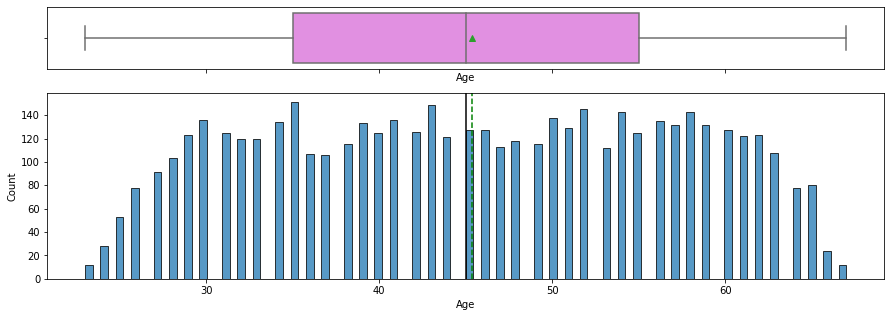

<IPython.core.display.Javascript object>

In [45]:
histogram_boxplot(data3, "Age", bins=100)

* The distribution of **Age** looks normal.
* There are NO outliers in this variable.
* Median age value around 45 by the histogram.

### Observations on Experience

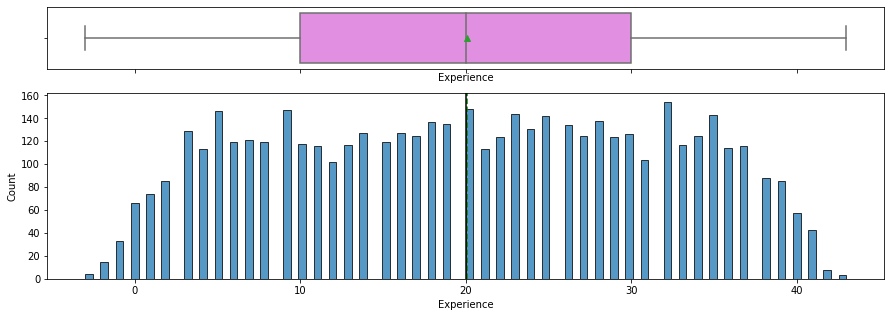

<IPython.core.display.Javascript object>

In [46]:
histogram_boxplot(data3, "Experience", bins=100)

* The distribution of **Experience** looks normal.
* There are NO outliers in this variable.
* Median Experience 20 years by the histogram.

### Observations on Income

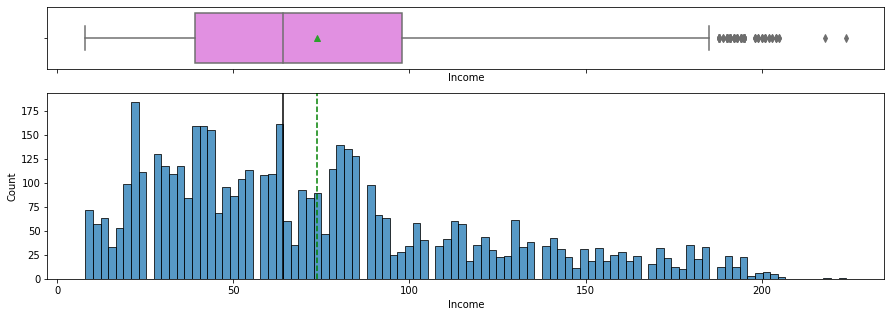

<IPython.core.display.Javascript object>

In [47]:
histogram_boxplot(data3, "Income", bins=100)

* The distribution of Income looks slightly right-skewed.
* There are outliers in this variable.
* averagely customers have income around **75K** dollars.

### Observations on Family

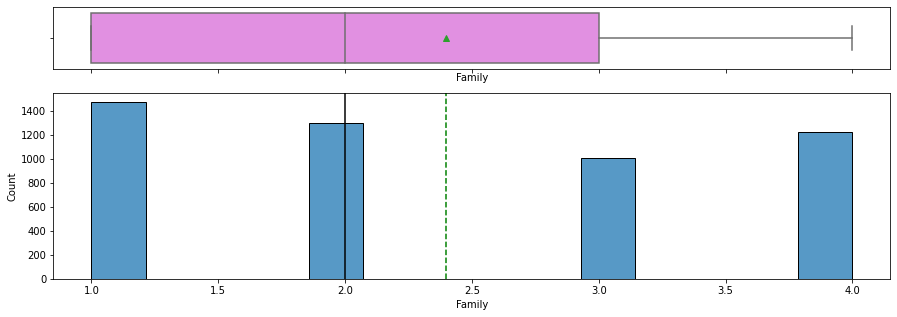

<IPython.core.display.Javascript object>

In [48]:
histogram_boxplot(data3, "Family")

* The distribution of **Family** looks normal.
* There are NO outliers in this variable.
* costumers have averagly 2 family members in their house unit.

### Observations on CCAvg

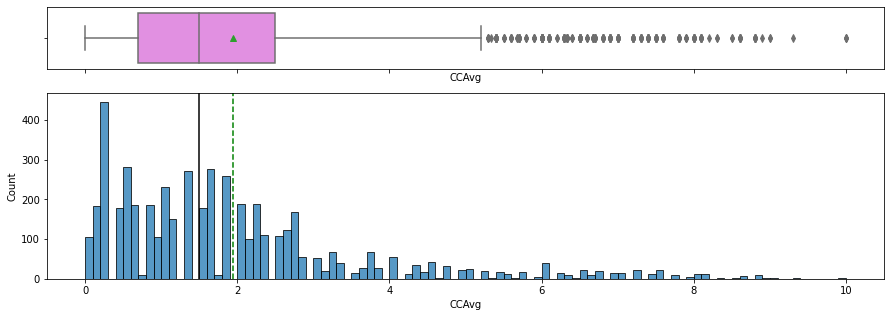

<IPython.core.display.Javascript object>

In [49]:
histogram_boxplot(data3, "CCAvg", bins=100)

* The distribution of **CCAvg** looks right-skewed.
* There are outliers in this variable.
* On average customers have spent **around 2k** by credit card averagly

In [50]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None, order=None, asc=False):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=15,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [51]:
data3.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,city
0,1,25,1,49,Pasadena,4,1.6,1,0,0,1,0,0,0,Others
1,2,45,19,34,Los Angeles,3,1.5,1,0,0,1,0,0,0,Los Angeles
2,3,39,15,11,Berkeley,1,1.0,1,0,0,0,0,0,0,Berkeley
3,4,35,9,100,San Francisco,1,2.7,2,0,0,0,0,0,0,San Francisco
4,5,35,8,45,Northridge,4,1.0,2,0,0,0,0,0,1,Others


<IPython.core.display.Javascript object>

### Observations on Mortgage

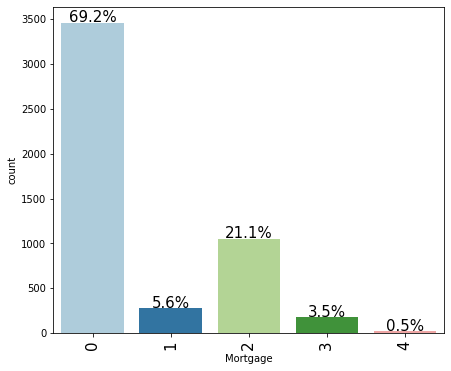

<IPython.core.display.Javascript object>

In [52]:
labeled_barplot(data3, "Mortgage", perc=True)

 * "Mortgage": {
 
       "0": -- mortgage = "0",
       "1" -- mortgage <= 100,
       "2" -- 100 < mortgage <= 300
       "3" -- 300 < mortgage <= 500,
       "4" -- mortgage > 500,

* 69% of the costumers have **NO Mortgage** account.
* 21% of the costumers have **Mortgage** accounts with balance between **100K** and **300K**.
* 5.6% of the costumers have **Mortgage** accounts with balance less than **100K**.
* 3.5% of the costumers have **Mortgage** accounts with balance between **300K** and **500K**.
* 0.5% of the costumers have **Mortgage** accounts with balance more than **500K**.

### Observations on City related with Zipcodes

<AxesSubplot:xlabel='count', ylabel='city'>

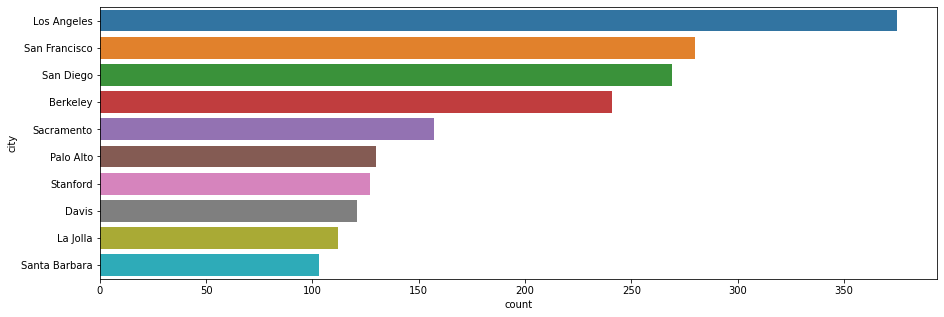

<IPython.core.display.Javascript object>

In [53]:
## replace others to numpy nan variable and drop it from dataframe to see cities where there is more than 100 costumer's address

df_1 = data3.copy()

df_1["city"] = df_1["city"].replace("Others", np.nan)

# df_1["city"] = df_1["city"].replace("unknown", np.nan)

df_1["city"].dropna()


# perc_on_bar(df_1, "best_seller")
plt.figure(figsize=(15, 5))
sns.countplot(y="city", data=df_1, order=df_1["city"].value_counts().index)

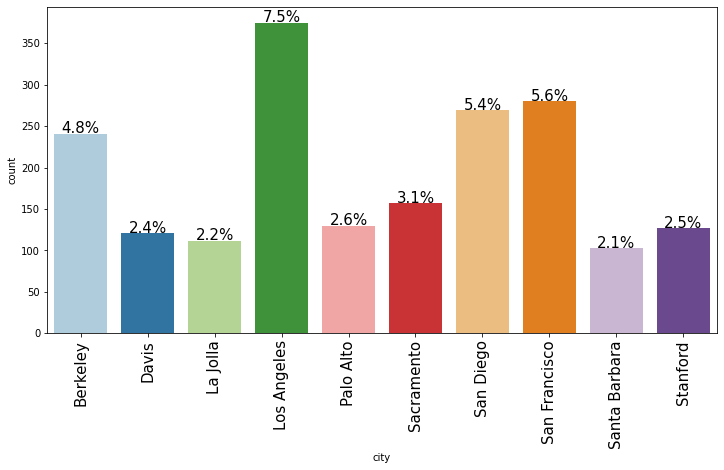

<IPython.core.display.Javascript object>

In [54]:
# percentage of city that has more than 100 costumer's address

labeled_barplot(df_1, "city", perc=True)

* Mostly, more than 100 costumers , residential areas are that **Los Angels**, **San Francisco**, **San Diego** , **Berkeley**, **Sacramento**, **Palo Alto**, **Stanford**, **Davis**, **La Jolla** and **Santa Barbara**
* Marketing team would do campaign works in these city as target areas which most costumers live in

### Observations on Education

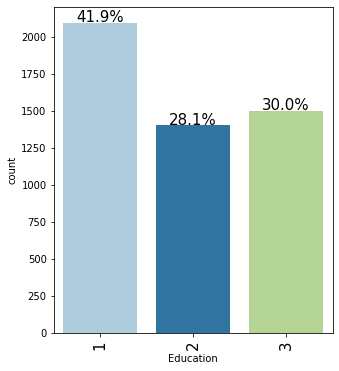

<IPython.core.display.Javascript object>

In [55]:
# Education Level 1: Undergrad; 2: Graduate;3: Advanced/Professional

labeled_barplot(data3, "Education", perc=True)

### Observations on Family

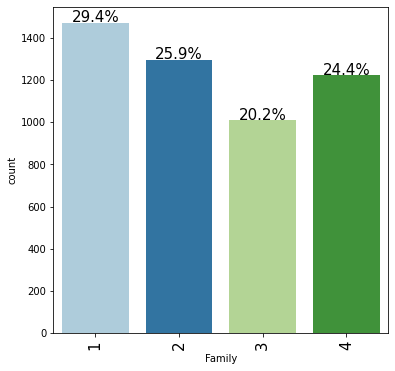

<IPython.core.display.Javascript object>

In [56]:
labeled_barplot(data3, "Family", perc=True)

*  29.4% of the Costumer's Family size are **1**, 25.9% of the Costumer's Family size are **2**,  20.2% of the Costumer's Family size are **3** and 24.4% of the Costumer's Family size are **4**.


* 41.9% of the customer's Education Level are **Undergrad**, 28.1% of the customer's Education Level are **Graduate** and 30.0% of the customer's Education Level are **Advanced/Professional**. 

### Observations on Personal_Loan

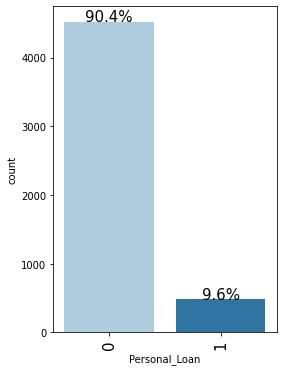

<IPython.core.display.Javascript object>

In [57]:
labeled_barplot(data3, "Personal_Loan", perc=True)

* 90.4% of the costumers have **NO Personal_Loan**.

### Observations on Securities_Account

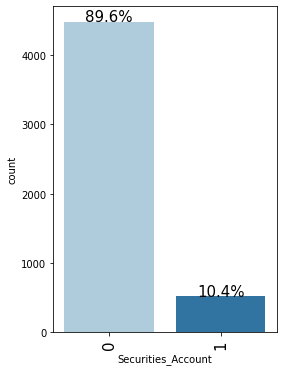

<IPython.core.display.Javascript object>

In [58]:
labeled_barplot(data3, "Securities_Account", perc=True)

* 89.6% of the costumers have **NO Securities_Account**.

### Observations on CD_Account

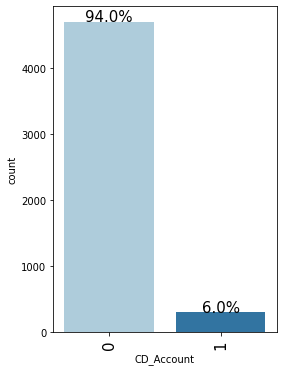

<IPython.core.display.Javascript object>

In [59]:
# limiting to only top 5 ocuurences
labeled_barplot(data3, "CD_Account", perc=True)

* 94.0% of the costumers have **NO certificate of deposit (CD) account**  with the bank.

### Observations on Online

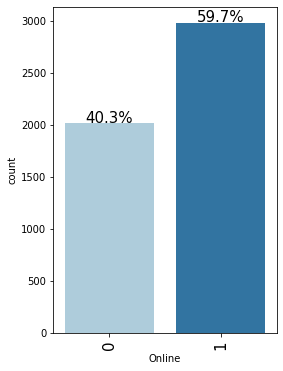

<IPython.core.display.Javascript object>

In [60]:
labeled_barplot(data3, "Online", perc=True)

* 40.3 % of the costumers have **NO Online Banking Account**.

### Observations on CreditCard

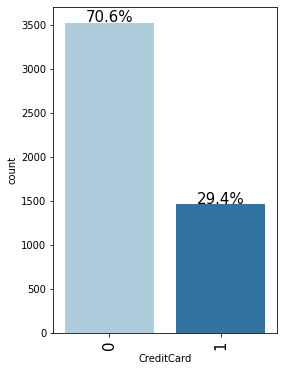

<IPython.core.display.Javascript object>

In [61]:
labeled_barplot(data3, "CreditCard", perc=True)

* 70.6 % of the costumers have **NO Credit Card**.

### convert city column to numeric dummy data

In [62]:
data3["city"].unique()

array(['Others', 'Los Angeles', 'Berkeley', 'San Francisco', 'San Diego',
       'Santa Barbara', 'Stanford', 'Sacramento', 'Davis', 'La Jolla',
       'Palo Alto'], dtype=object)

<IPython.core.display.Javascript object>

In [63]:
data2 = data1.copy()

<IPython.core.display.Javascript object>

In [64]:
replaceStruct = {
    "city": {
        "Others": "0",
        "Los Angeles": "1",
        "Berkeley": "2",
        "San Francisco": "3",
        "San Diego": "4",
        "Santa Barbara": "5",
        "Stanford": "6",
        "Sacramento": "7",
        "Davis": "8",
        "La Jolla": "9",
        "Palo Alto": "10",
    }
}

<IPython.core.display.Javascript object>

In [65]:
data3 = data3.replace(replaceStruct)
data3.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,city
0,1,25,1,49,Pasadena,4,1.6,1,0,0,1,0,0,0,0
1,2,45,19,34,Los Angeles,3,1.5,1,0,0,1,0,0,0,1
2,3,39,15,11,Berkeley,1,1.0,1,0,0,0,0,0,0,2
3,4,35,9,100,San Francisco,1,2.7,2,0,0,0,0,0,0,3
4,5,35,8,45,Northridge,4,1.0,2,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [66]:
# drop zipcode and id column, No need anymore
data3.drop("ZIPCode", axis=1, inplace=True)
data3.drop("ID", axis=1, inplace=True)
data3.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,city
0,25,1,49,4,1.6,1,0,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0,1
2,39,15,11,1,1.0,1,0,0,0,0,0,0,2
3,35,9,100,1,2.7,2,0,0,0,0,0,0,3
4,35,8,45,4,1.0,2,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [67]:
data3.city.value_counts().index

Index(['0', '1', '3', '4', '2', '7', '10', '6', '8', '9', '5'], dtype='object')

<IPython.core.display.Javascript object>

In [68]:
data3["city"] = data3["city"].astype(int)
data3.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,city
0,25,1,49,4,1.6,1,0,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0,1
2,39,15,11,1,1.0,1,0,0,0,0,0,0,2
3,35,9,100,1,2.7,2,0,0,0,0,0,0,3
4,35,8,45,4,1.0,2,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

## Bivariate Analysis

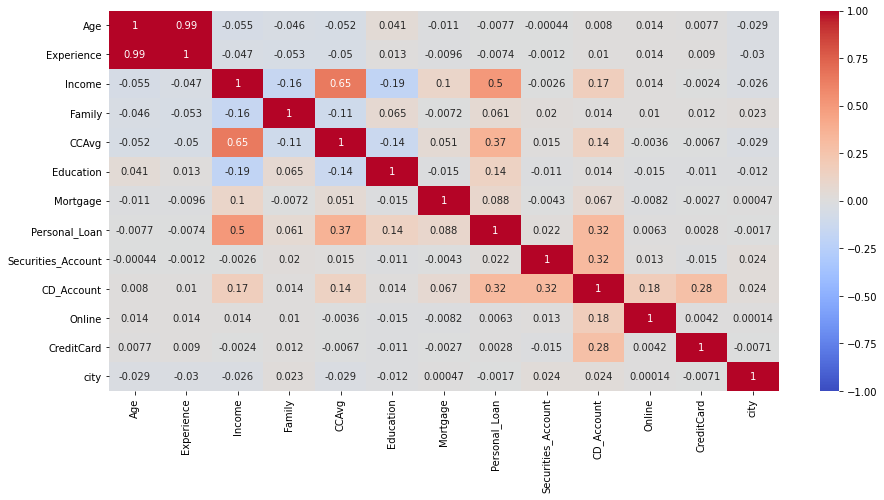

<IPython.core.display.Javascript object>

In [69]:
plt.figure(figsize=(15, 7))
sns.heatmap(data3.corr(), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

* **Personal_Loan** shows the highest correlation with **Income** (0.5) simply because People try to improve their life standart when **Income** is increased
* **Experience** and **Age** are very highly correlated(0.99) with each other. We can remove one of these column
* **CCAvg** (credit card spending) is highly correlated with **Income**, if people feel confident about their Income, they start spending, So it's nature of human psycology.
* **Personal_Loan** shows slightly positive correlation with **Income** (0.5), **CCAvg** (0.37), **CD_Account** (0.32),


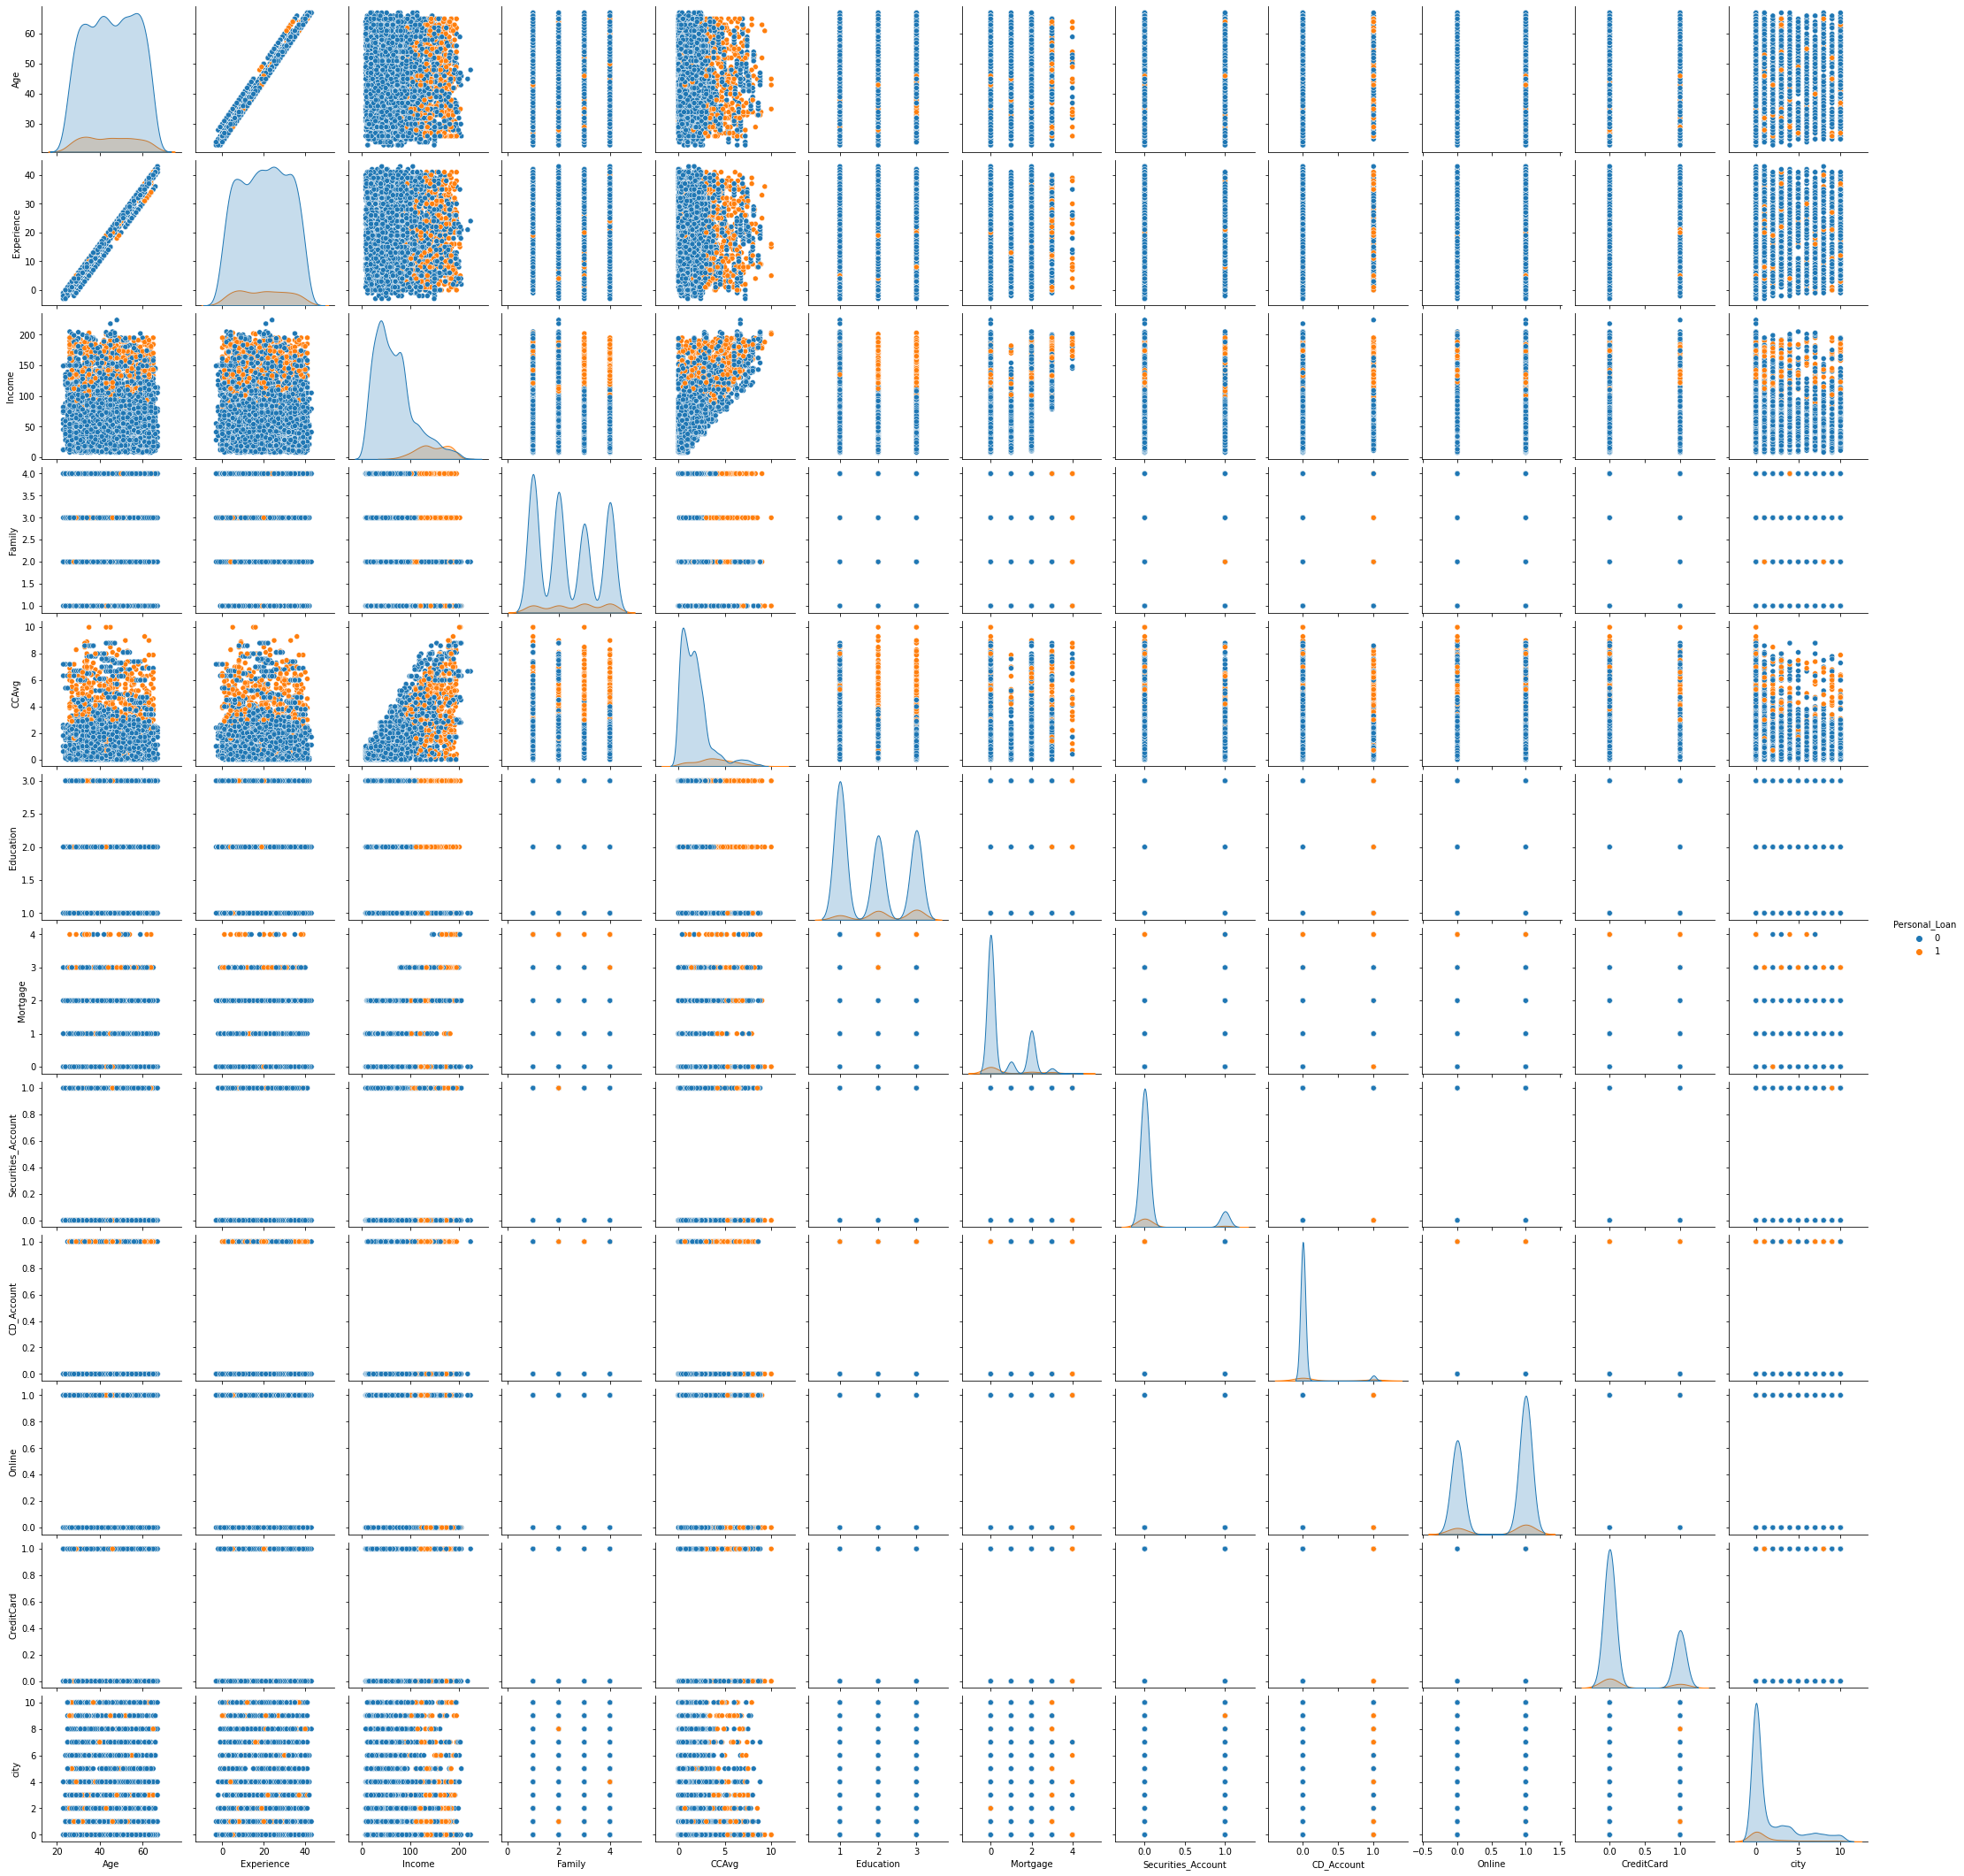

<IPython.core.display.Javascript object>

In [70]:
sns.pairplot(data=data3, hue="Personal_Loan")
plt.show()

* We can see varying distributions in variables.

In [71]:
import matplotlib.ticker as mtick

<IPython.core.display.Javascript object>

In [72]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [73]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(20, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

In [74]:
data3.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,city
0,25,1,49,4,1.6,1,0,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0,1
2,39,15,11,1,1.0,1,0,0,0,0,0,0,2
3,35,9,100,1,2.7,2,0,0,0,0,0,0,3
4,35,8,45,4,1.0,2,0,0,0,0,0,1,0


<IPython.core.display.Javascript object>

### Personal_Loan vs Age, Experience, Income, Education and  CCAvg 

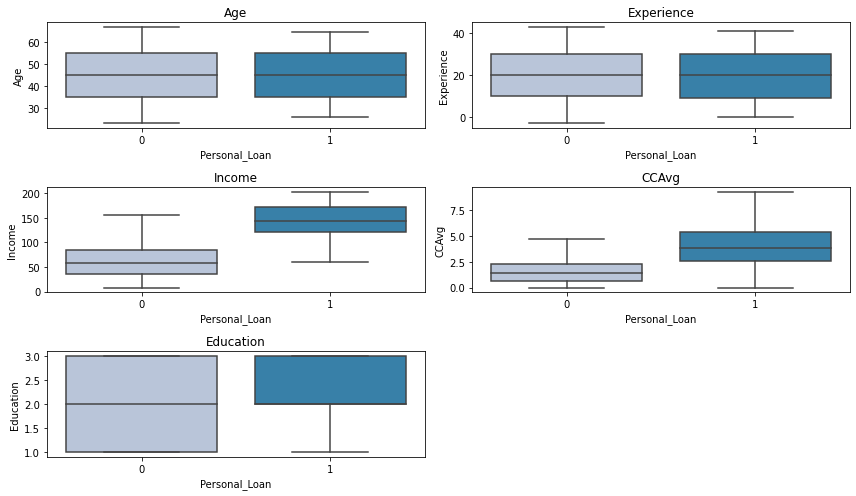

<IPython.core.display.Javascript object>

In [75]:
cols = data3[
    [
        "Age",
        "Experience",
        "Income",
        "CCAvg",
        "Education",
    ]
].columns.tolist()
plt.figure(figsize=(12, 7))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(
        data2["Personal_Loan"], data2[variable], palette="PuBu", showfliers=False
    )
    plt.tight_layout()
    plt.title(variable)
plt.show()

* costumers who have more credit card spending **(CCAvg)** are more likely to get **Personal_Loan**.
* costumers who have more **Income** are more likely to get **Personal_Loan**.  
* costumers who get **Personal_Loan** are likely having education level over 2.5 that means **Graduate** or **Advanced/Professional**  degree.
* **Age** and **Experience** are not likely effective to get **Personal_Loan**.

### Personal_Loan vs Family

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


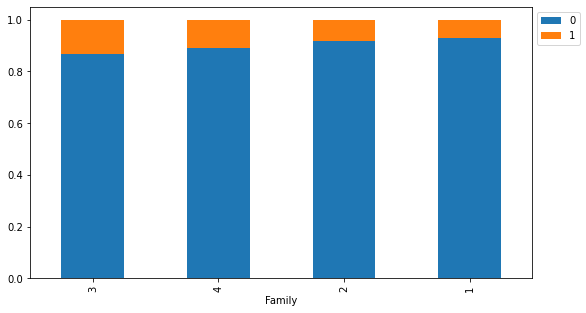

<IPython.core.display.Javascript object>

In [76]:
stacked_barplot(data3, "Family", "Personal_Loan")

* 29.4% of the Costumer's Family size are *1**, 25.9% of the Costumer's Family size are *2**,  20.2% of the Costumer's Family size are *3** and 24.4% of the Costumer's Family size are *4**.
* it's about % 10 of the costumer (134 out of 1222) who have *4** Family Member have *Personal_Loan** account.
* it's about % 13 of the costumer (133 out of 1010) who have *3** Family Member have *Personal_Loan** account.
* it's about % 8 of the costumer (106 out of 1296) who have *2** Family Member have *Personal_Loan** account.
* it's about % 7 of the costumer (107 out of 1472) who have *1** Family Member have *Personal_Loan** account.
* Costumers who have more family members seems more effective to get *Personal_Loan** account.


### Personal_Loan vs city

Personal_Loan     0    1   All
city                          
All            4520  480  5000
0              2784  301  3085
1               337   38   375
2               214   27   241
4               248   21   269
3               260   20   280
10              114   16   130
7               142   15   157
9                97   15   112
6               114   13   127
5                95    8   103
8               115    6   121
------------------------------------------------------------------------------------------------------------------------


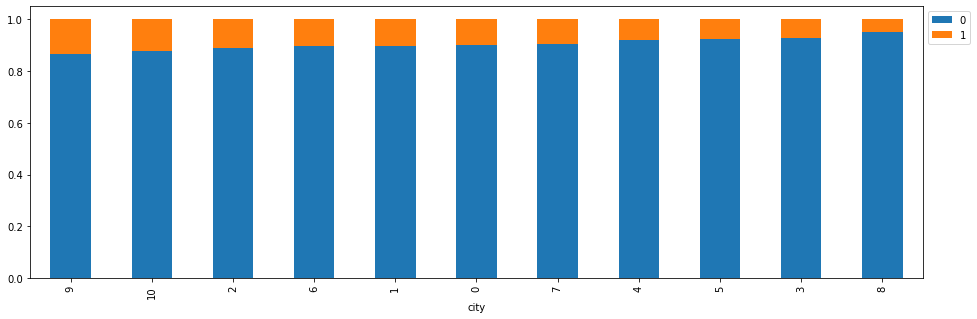

<IPython.core.display.Javascript object>

In [77]:
stacked_barplot(data3, "city", "Personal_Loan")

* "city": {     "Others": "0",
                "Los Angeles":  "1",
                "Berkeley": "2",
                 "San Francisco": "3",
                 "San Diego":  "4",
                "Santa Barbara": "5",
                "Stanford": "6",
                "Sacramento": "7",
                "Davis": "8",
                "La Jolla": "9",
                "Palo Alto": "10"}
                
* 0= **others** other than 10 city (rest of the CA cities) which has **less than 100** residential costumer address.
                
* Above list is first 10 defined (located **more than 100** costumers residential address) location who costumers live in,
* Costumers who live in **Palo Alto** and **La Jolla**  would more likely get **Personal_Loan**.
* Marketing Team would target this city for campaign to increase **Personal_Loan**, because there would be more people who is familiar with the bank in those locations, but, on the other hand, city or location has **NO** significant positive correlation with using  **Personal_Loan** 
    

### Personal_Loan vs Securities_Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


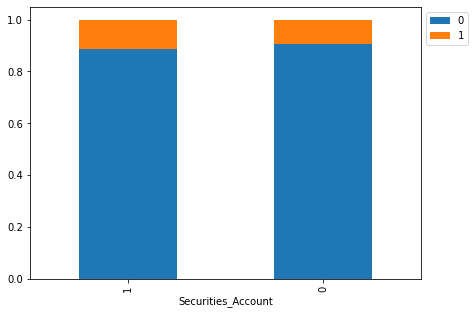

<IPython.core.display.Javascript object>

In [78]:
stacked_barplot(data3, "Securities_Account", "Personal_Loan")

* Majority, it's about % 90, of the costumer (4478 out of 5000 Costumers) don't have **Securities_Account**.
* Number of costumers who have a **Securities_Account** is only 522 out of 5000. and Only 60 out of 522 so that it's about %14 of **Securities_Account** holders have a **Personal_Loan**.
* 60 out of 480, it's about % 12 of the **Personal_Loan**, costumers are also **Securities_Account** holders.
* First, Administration would investigate why **Securities_Account** holders are very low in total, because 420 costumers who does not have a **Securities_Account** already used **Personal_Loan**.
* Having **Securities_Account** looks like **NOT** affecting to increase **Personal_Loan** account in the bank. 

### Personal_Loan vs CD_Account

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


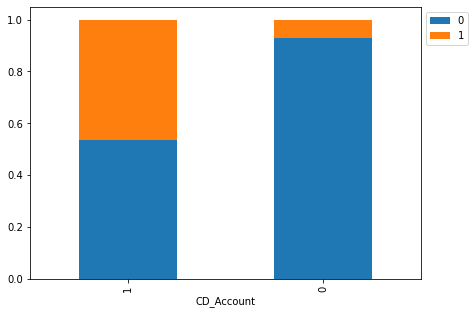

<IPython.core.display.Javascript object>

In [79]:
stacked_barplot(data3, "CD_Account", "Personal_Loan")

* Majority, it's about % 95, of the costumer (4698 out of 5000 Costumers) don't have **CD_Account**.
* Number of costumers who have a **CD_Account** is totaly 302. And 140 out of 302 so that it's about % 45 of **CD_Account** holders used **Personal_Loan**.
* it's about % 29 of the **Personal_Loan** costumers are also **CD_Account** holders.
* Management should investigate why **CD_Account** holders are very low in total bank costumers. And then, Marketing team would target to **CD_Account** holder costumers because they are more likely to use **Personal_Loan** from the bank.
* Having **CD_Account** looks like **positively** affecting to increase **Personal_Loan** account in the bank.

### Personal_Loan vs Online

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


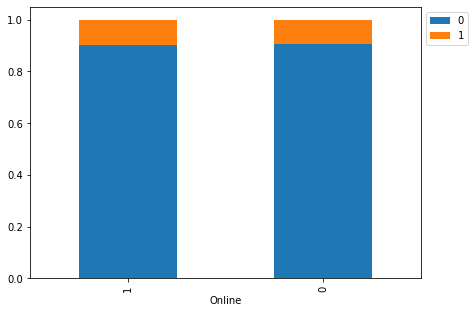

<IPython.core.display.Javascript object>

In [80]:
stacked_barplot(data3, "Online", "Personal_Loan")

* More than half , it's about % 60, of the bank costumers (2984 out of 5000)  have an **Online** banking account.
* 291 out of 2984 so that it's about % 10 of **Online** account holders used **Personal_Loan**.
* it's about % 45 of the **Personal_Loan** costumers are also **Online** account holders, but having **Online** account looks like **NOT** affecting to increase **Personal_Loan** account.

### Personal_Loan vs CreditCard

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


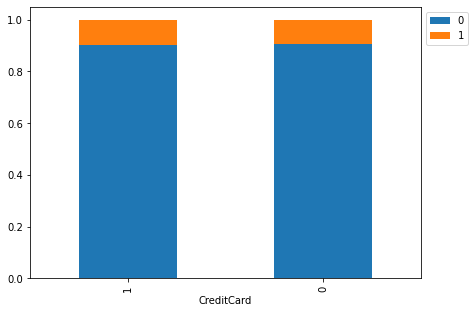

<IPython.core.display.Javascript object>

In [81]:
stacked_barplot(data3, "CreditCard", "Personal_Loan")

* Majority, it's about % 70, of the costumer (3530 out of 5000) don't have **CreditCard** account.
* 143 out of 1470 so that it's about % 10 of **CreditCard** account holders used **Personal_Loan**.
* it's about % 29 of the **Personal_Loan** costumers are also **CreditCard** account holders, but having **CreditCard** account looks like **NOT** affecting to increase **Personal_Loan** account.

### Personal_Loan vs Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


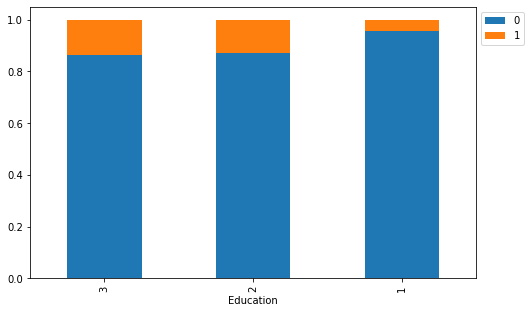

<IPython.core.display.Javascript object>

In [82]:
stacked_barplot(data3, "Education", "Personal_Loan")

* 41.9% of the customer's Education Level are **Undergrad**, 28.1% of the customer's Education Level are **Graduate** and 30.0% of the customer's Education Level are **Advanced/Professional**.
* it's about % 15 of the costumer (205 out of 1296) who have **Advanced/Professional** degree have **Personal_Loan** account.
* it's about % 14 of the costumer (182 out of 1221) who have **Graduate** degree have **Personal_Loan** account.
* it's about % 4 of the costumer (93 out of 2003) who have **Undergrad** degree have **Personal_Loan** account.
* costumers who have more advance Education level like **Graduate** and **Advanced/Professional** seems more effective than less education level like **Undergrad** to get **Personal_Loan** account.

### Personal_Loan vs Mortgage

Personal_Loan     0    1   All
Mortgage                      
All            4520  480  5000
0              3150  312  3462
2               976   79  1055
3               116   60   176
4                 9   16    25
1               269   13   282
------------------------------------------------------------------------------------------------------------------------


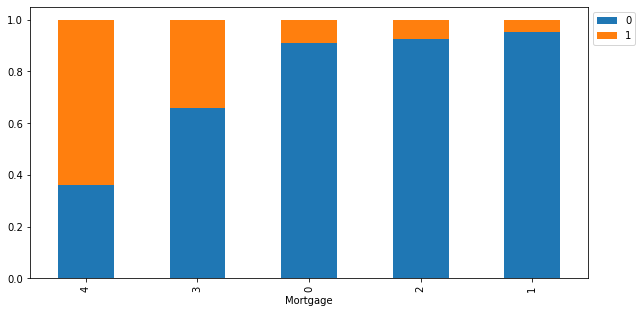

<IPython.core.display.Javascript object>

In [83]:
stacked_barplot(data3, "Mortgage", "Personal_Loan")

 * "Mortgage": {
 
       "0": -- mortgage = "0",
       "1" -- mortgage <= 100,
       "2" -- 100 < mortgage <= 300
       "3" -- 300 < mortgage <= 500,
       "4" -- mortgage > 500,
 
* it's about % 4 of the costumer (13 out of 282) who have **Mortgage** account with balance less than **100k** have **Personal_Loan** account.
* it's about % 7 of the costumer (79 out of 1055) who have **Mortgage** account with balance between **100k** and **300k**  have **Personal_Loan** account.
* it's about % 34 of the costumer (60 out of 176) who have **Mortgage** account with balance between **300k** and **500k**  have **Personal_Loan** account.
* it's about % 64 of the costumer (16 out of 25) who have **Mortgage** account with balance more than **500k** have **Personal_Loan** account.
* Costumers who have more balance on **Mortgage** account seems more effective than less balance account to get **Personal_Loan** account.


### <a id='link1'>Summary of EDA</a>
**Data Description:**

- There are NO duplicate values in the dataset, which were dropped.
- There are no missing values in the data.
- All the data-types are either *int64* or *float64*.
- 2 columns - Mortgage and ZIPCode are having data-types as an *int64* but regressional, this means we need to convert these into categorical before we feed our data into the model.


**Observations from EDA:**

`Personal_Loan`: 

* 90.4% of the costumers have *NO Personal_Loan**.


`Age`: 

* Median Age is around 45.

`Personal_Loan vs Age`: 

* `Age` is  less likely effective to get *Personal_Loan*.

`Experience`: 

* Median Experience is around 20 years.


`Personal_Loan vs Experience`: 

* `Experience` is less likely effective to get *Personal_Loan**.


`CCAvg`: 

* Customers have spent around 2k/Month by credit card averagly.

`Personal_Loan vs CCAvg`: 

* Costumers who have more credit card spending `CCAvg` are more likely to get *Personal_Loan**..

`Income`:

* customers have income around *75K** dollars avaeragly.

`Personal_Loan vs Income`: 

* Costumers who have more `Income` are more likely to get *Personal_Loan**.

`Education`: 

* 41.9% of the customer's Education Level are *Undergrad**, 28.1% of the customer's Education Level are *Graduate** and 30.0% of the customer's Education Level are *Advanced/Professional**. 


`Personal_Loan vs Education`: 

* it's about % 15 of the costumer (205 out of 1296) who have *Advanced/Professional** degree have *Personal_Loan** account.
* it's about % 14 of the costumer (182 out of 1221) who have *Graduate** degree have *Personal_Loan** account.
* it's about % 4 of the costumer (93 out of 2003) who have *Undergrad** degree have *Personal_Loan** account.
* costumers who have more advance Education level like *Graduate** and *Advanced/Professional** seems more effective than less education level like *Undergrad** to get *Personal_Loan** account.


`Family`: 

* Costumers have averagly 2 family members in their house unit. 
* 29.4% of the Costumer's Family size are *1**, 25.9% of the Costumer's Family size are *2**,  20.2% of the Costumer's Family size are *3** and 24.4% of the Costumer's Family size are *4**.


`Personal_Loan vs Family`: 

* it's about % 10 of the costumer (134 out of 1222) who have *4** Family Member have *Personal_Loan** account.
* it's about % 13 of the costumer (133 out of 1010) who have *3** Family Member have *Personal_Loan** account.
* it's about % 8 of the costumer (106 out of 1296) who have *2** Family Member have *Personal_Loan** account.
* it's about % 7 of the costumer (107 out of 1472) who have *1** Family Member have *Personal_Loan** account.
* Costumers who have more family members seems more effective to get *Personal_Loan** account.


`Zipcode(City)`: 

* 10 Cities where More than 100 costumer's residential address is located are *Los Angeles, Berkeley, San Francisco, San Diego, Santa Barbara, Stanford, Sacramento, Davis, La Jolla, Palo Alto. 


`Personal_Loan vs Zipcode(City)`: 

* Costumers who live in *Palo Alto** and *La Jolla**  would more likely get *Personal_Loan**.
* Marketing Team would target this city for campaign to increase *Personal_Loan**, because there would be more people who is familiar with the bank in those locations, but, on the other hand, city or zipcodes has *NO** significant positive correlation with using  *Personal_Loan** 


`CreditCard`: 

* Majority, it's about % 70, of the costumer (3530 out of 5000) don't have *CreditCard** account.


`Personal_Loan vs CreditCard`: 

* 143 out of 1470 so that it's about % 10 of *CreditCard** account holders used *Personal_Loan**.
* it's about % 29 of the *Personal_Loan** costumers are also *CreditCard** account holders, having *CreditCard** account looks like positivley affecting to increase *Personal_Loan** account.



`Securities_Account`: 

* Majority, it's about % 90, of the costumer (4478 out of 5000 Costumers) don't have *Securities_Account**.
* Number of costumers who have a *Securities_Account** is only 522 out of 5000. and Only 60 out of 522 so that it's about %14 of *Securities_Account** holders have a *Personal_Loan**.


`Personal_Loan vs Securities_Account`:

* it's about % 14 of the *Personal_Loan**, costumers are also *Securities_Account** holders.
* First, Administration would investigate why *Securities_Account** holders are very low in total, because 14% costumers who  have a *Securities_Account** already used *Personal_Loan**.
* Having *Securities_Account** looks like  affecting *positively** to increase *Personal_Loan** account in the bank.


`Mortgage`: 

* 69% of the costumers have *NO Mortgage** account.
* 21% of the costumers have *Mortgage** accounts with balance between *100K** and *300K**.
* 5.6% of the costumers have *Mortgage** accounts with balance less than *100K**.
* 3.5% of the costumers have *Mortgage** accounts with balance between *300K** and *500K**.
* 0.5% of the costumers have *Mortgage** accounts with balance more than *500K**.


`Personal_Loan vs Mortgage`:

* it's about % 4 of the costumer (13 out of 282) who have *Mortgage** account with balance less than *100k** have *Personal_Loan** account.
* it's about % 7 of the costumer (79 out of 1055) who have *Mortgage** account with balance between *100k** and *300k**  have *Personal_Loan** account.
* it's about % 34 of the costumer (60 out of 176) who have *Mortgage** account with balance between *300k** and *500k**  have *Personal_Loan** account.
* it's about % 64 of the costumer (16 out of 25) who have *Mortgage** account with balance more than *500k** have *Personal_Loan** account.
* Costumers who have more balance on *Mortgage** account seems more effective than less balance account to get *Personal_Loan** account.


* `CD_Account`:

 * 94.0% of the costumers have *NO certificate of deposit (CD) account**  with the bank.
 * Number of costumers who have a *CD_Account** is totaly 302. And 140 out of 302 so that it's about % 45 of *CD_Account** holders used *Personal_Loan**.


`Personal_Loan vs CD_Account`:

* it's about % 29 of the *Personal_Loan** costumers are also *CD_Account** holders.
* Management should investigate why *CD_Account** holders are very low in total bank costumers. And then, Marketing team would target to *CD_Account** holder costumers because they are more likely to use *Personal_Loan** from the bank.
* Having *CD_Account** looks like *positively** affecting to increase *Personal_Loan** account in the bank.


* `Online`:

* 40.3 % of the costumers have *NO Online Banking Account**

`Personal_Loan vs Online`:

* More than half , it's about % 60, of the bank costumers (2984 out of 5000)  have an *Online** banking account.
* 291 out of 2984 so that it's about % 10 of *Online** account holders used *Personal_Loan**.
* it's about % 45 of the *Personal_Loan** costumers are also *Online** account holders, having *Online** account seems  affecting significantly to increase *Personal_Loan** account.


## Split Data

In [84]:
X = data3.drop("Personal_Loan", axis=1)  # Features
y = data3["Personal_Loan"].astype("int64")  # Labels (Target Variable)
# converting target to integers - since some functions might not work with bool type

<IPython.core.display.Javascript object>

In [85]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3500, 12) (1500, 12)


<IPython.core.display.Javascript object>

In [86]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


<IPython.core.display.Javascript object>

In [87]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

### Model evaluation criterion

### Model can make wrong predictions as:

1. Predicting a customer who have a Personal_Loan account but in reality the customer would not have a Personal_Loan account. - Loss of resources

2. Predicting a customer who don't have a Personal_Loan account but in reality the customer would have a Personal_Loan account. - Loss of opportunity

### Which case is more important? 

* If we predict a customer who did not have a Personal_Loan account but in reality would have a Personal_Loan account.

### How to reduce this loss?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The get_recall_score function will be used to check the model performance of models. 
* The make_confusion_matrix function will be used to plot confusion matrix.

In [88]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable

    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

<IPython.core.display.Javascript object>

In [89]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("Actual label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [90]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

<IPython.core.display.Javascript object>

In [91]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

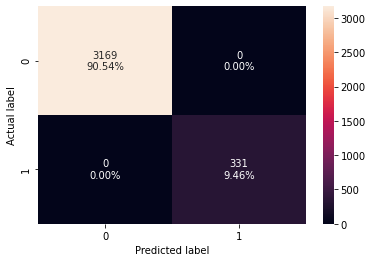

<IPython.core.display.Javascript object>

In [92]:
confusion_matrix_sklearn(model, X_train, y_train)

In [93]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


<IPython.core.display.Javascript object>

* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

#### Checking model performance on test set

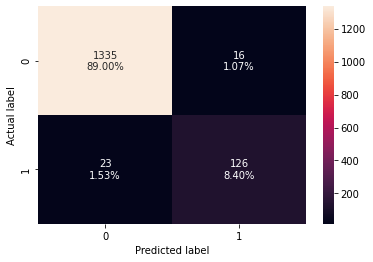

<IPython.core.display.Javascript object>

In [94]:
confusion_matrix_sklearn(model, X_test, y_test)

In [95]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.8456375838926175


<IPython.core.display.Javascript object>

* Recall is 0.84, looks good but there is a some disparity in performance of model on training set and test set. we need to look at if we can reduce complexity and improve the model performans.

## Visualizing the Decision Tree

In [96]:
## creating a list of column names
feature_names = X_train.columns.to_list()

<IPython.core.display.Javascript object>

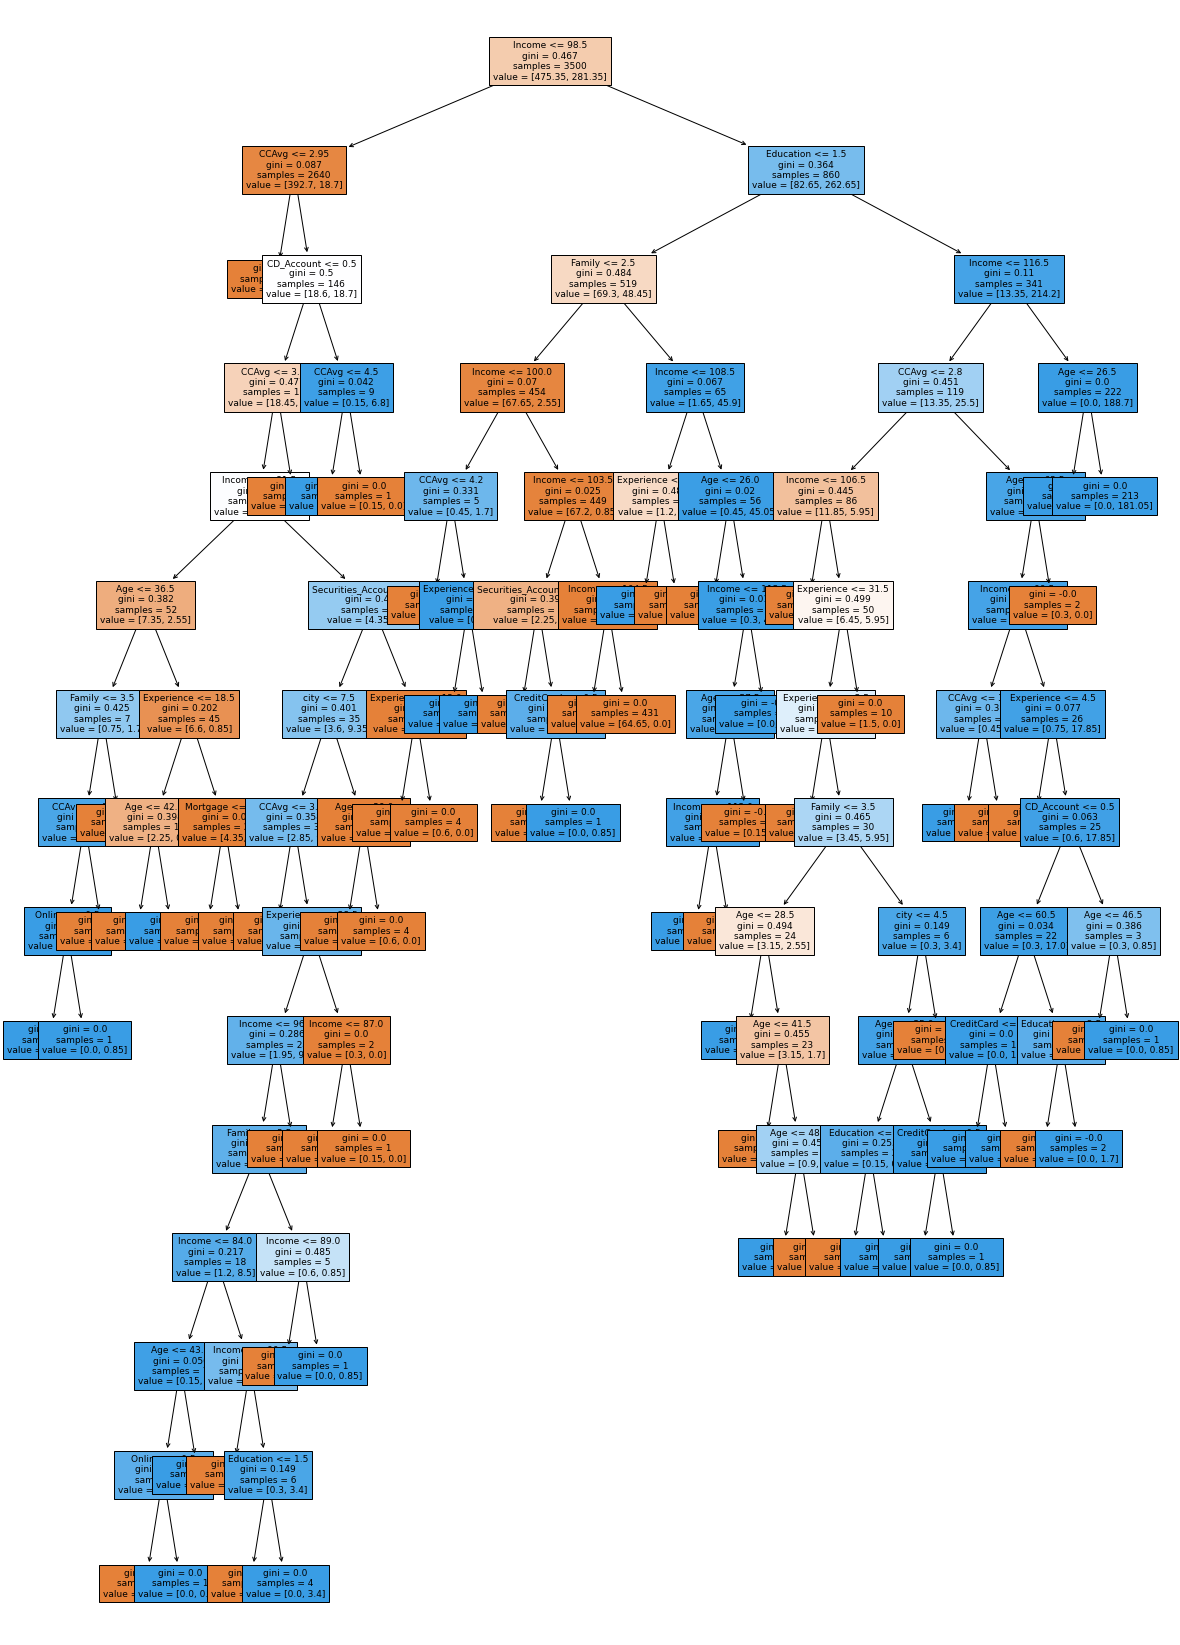

<IPython.core.display.Javascript object>

In [97]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* The tree above seems complex and difficult to interpret.

In [98]:
# importance of features in the tree building (Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                             Imp
Income              5.950683e-01
Family              1.440076e-01
Education           1.269883e-01
CCAvg               8.280380e-02
Age                 1.971175e-02
CD_Account          1.136138e-02
Experience          1.066071e-02
Securities_Account  4.860245e-03
city                3.095043e-03
CreditCard          7.213956e-04
Online              7.213956e-04
Mortgage            2.049387e-17


<IPython.core.display.Javascript object>

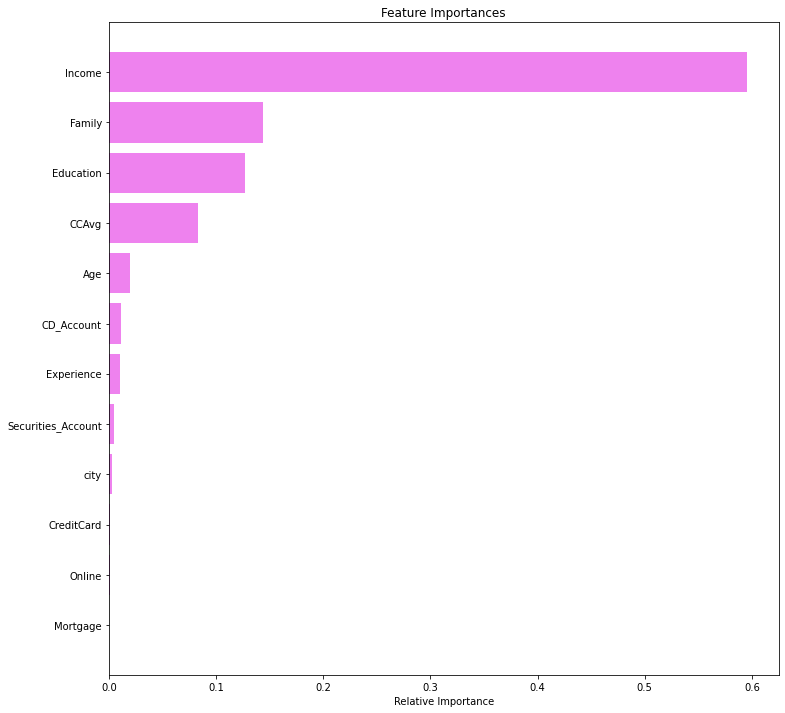

<IPython.core.display.Javascript object>

In [99]:
# we can visualize importance Features

importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, **Income** is the most important variable followed by Family Size for predicting the Personal_Loan.

#### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of our model, so we usually resort to experimentation.
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 

In [100]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=5,
                       min_impurity_decrease=1e-05, random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

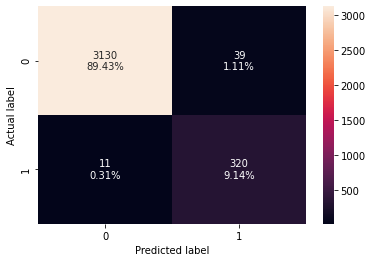

<IPython.core.display.Javascript object>

In [101]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [102]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.9667673716012085


<IPython.core.display.Javascript object>

#### Checking performance on test set

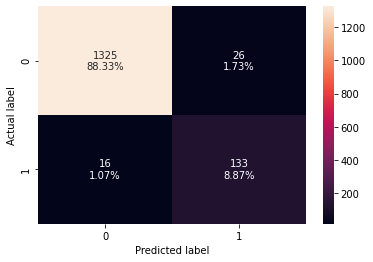

<IPython.core.display.Javascript object>

In [103]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [104]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.8926174496644296


<IPython.core.display.Javascript object>

* The model is giving a generalized result now.

## Visualizing the Decision Tree

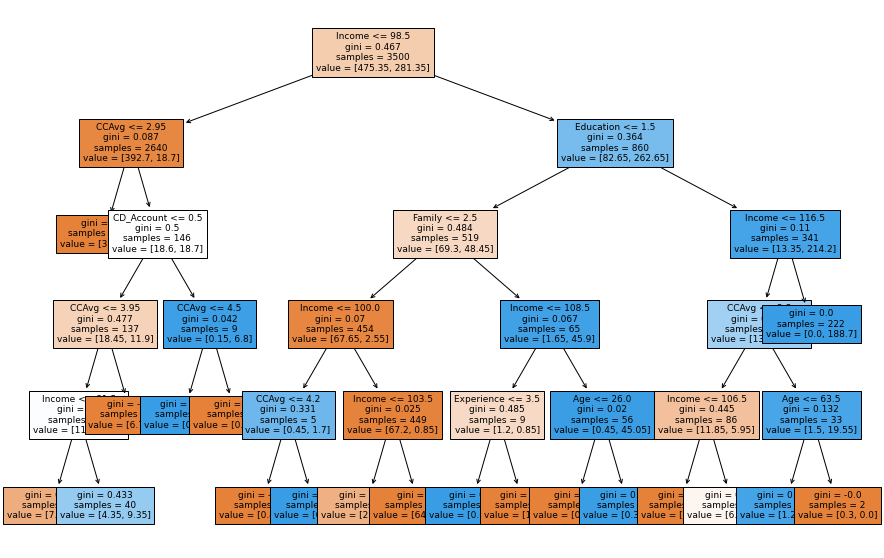

<IPython.core.display.Javascript object>

In [105]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [106]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- weights: [7.35, 2.55] class: 0
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- weights: [4.35, 9.35] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [6.75, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- CCAvg <= 4.50
|   |   |   |   |--- weights: [0.00, 6.80] class: 1
|   |   |   |--- CCAvg >  4.50
|   |   |   |   |--- weights: [0.15, 0.00] class: 0
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 100.00
|   |   |   |   |--- CCAvg <= 4.20
|   |   |   |   |   |--- weights: [0.45, 0.00] class: 0
|   |   |   |   |--- CCAvg >  4.20
|   |   |   |   |   |--- weights: [0.00, 1.70] class: 1
|   |   |   |--- Income >  100.00
|   |   |   |   |--- Income <= 

<IPython.core.display.Javascript object>

**Observations from the tree:**

Using the above extracted decision rules we can make interpretations from the decision tree model like:

* If customer's Income less than 98K and Credit card spending less than 3K/month would not get Personal_Loan account.
* If 81K < customer's Income < 98K and  3K/Month < Credit card spending < 4K/month would open Personal_Loan account.
* If 81K < customer's Income < 98K and   Credit card spending more than 4K/month would NOT open Personal_Loan account.
* If Family member more than 2 and incom less than 108K and Experience less than 4 years , costumer would open Personal Loan account but Experian less than 4 years then would not open personal loan account.
* If Costumer Education level Graduate or advanced and income less than 116K and credit card spending more than 2.8K/month and younger than 63 years old, then would open personal loan account.


In [107]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                         Imp
Income              0.622927
Family              0.146723
Education           0.130659
CCAvg               0.082588
CD_Account          0.011659
Experience          0.002984
Age                 0.002459
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000
city                0.000000


<IPython.core.display.Javascript object>

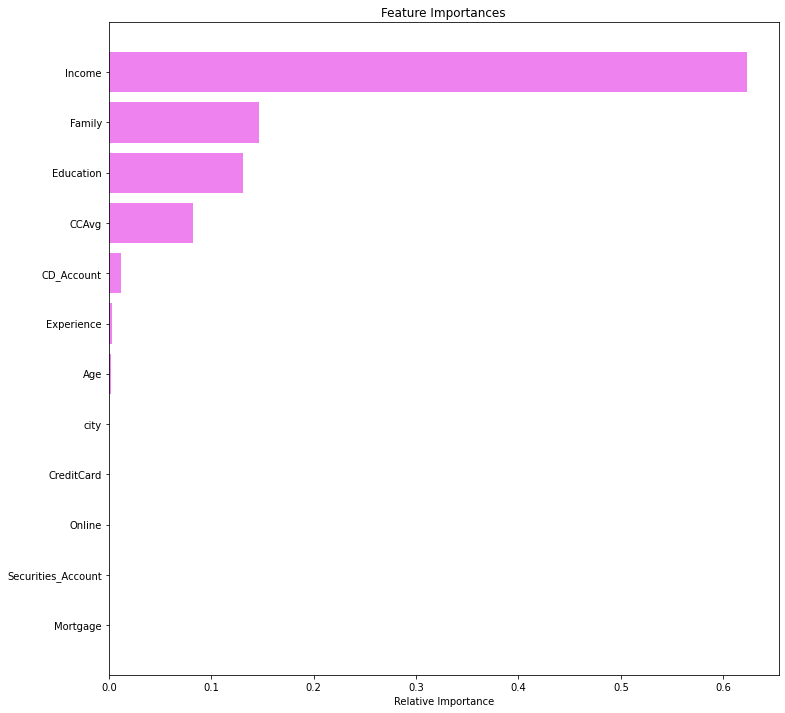

<IPython.core.display.Javascript object>

In [108]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In tuned decision tree Income is the most important feature followed by Family Size

## Cost Complexity Pruning


The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [109]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [110]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-7.422172e-15
1,7.482671e-19,-7.421424e-15
2,7.482671e-19,-7.420675e-15
3,7.482671e-19,-7.419927e-15
4,2.332833e-18,-7.417594e-15
5,3.521257e-18,-7.414073e-15
6,5.832082e-18,-7.408241e-15
7,8.979206e-18,-7.399262e-15
8,9.573418e-18,-7.389688e-15
9,1.143528e-16,-7.275335e-15


<IPython.core.display.Javascript object>

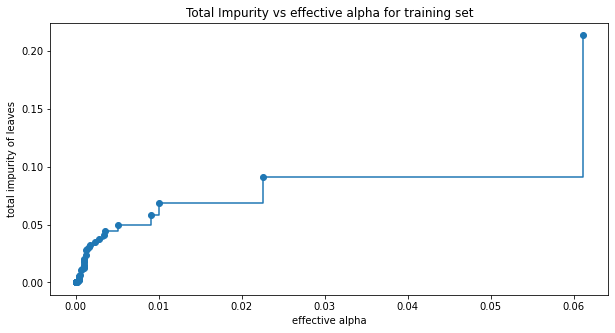

<IPython.core.display.Javascript object>

In [111]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [112]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.25379571489480907


<IPython.core.display.Javascript object>

we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

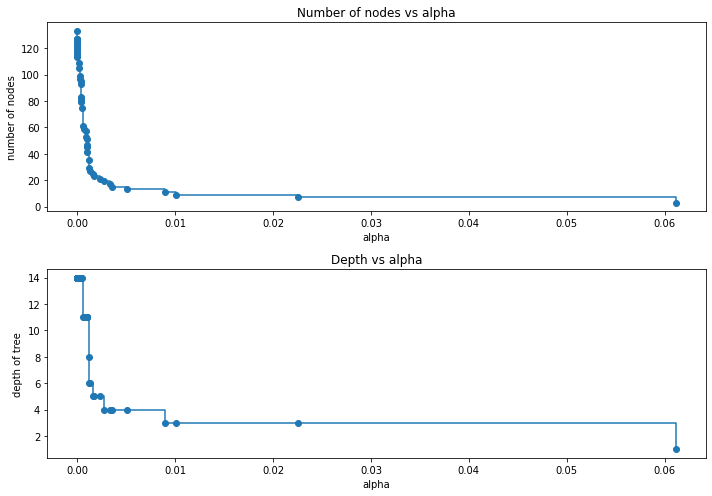

<IPython.core.display.Javascript object>

In [113]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [114]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [115]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

In [116]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

<IPython.core.display.Javascript object>

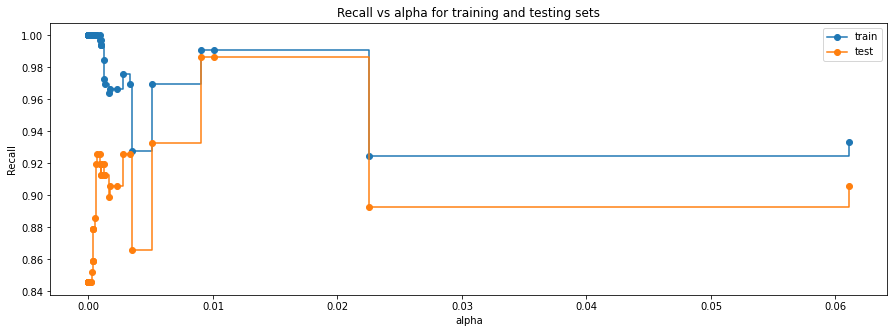

<IPython.core.display.Javascript object>

In [117]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas,
    recall_train,
    marker="o",
    label="train",
    drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [118]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.009008434301508075,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


<IPython.core.display.Javascript object>

**Maximum Recall is at 0.009 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.001 retaining information and getting higher recall.**

In [119]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.009008434301508075,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

<IPython.core.display.Javascript object>

#### checking performance on training set

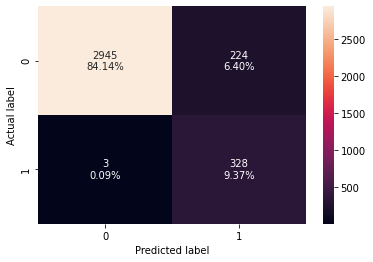

<IPython.core.display.Javascript object>

In [120]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [121]:
print("Recall Score:", get_recall_score(best_model, X_train, y_train))

Recall Score: 0.9909365558912386


<IPython.core.display.Javascript object>

#### checking performance on test set

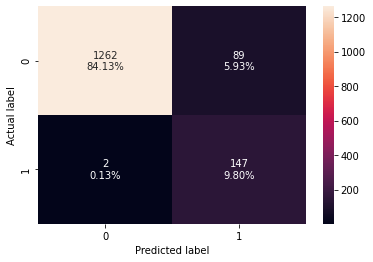

<IPython.core.display.Javascript object>

In [122]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [123]:
print("Recall Score:", get_recall_score(best_model, X_test, y_test))

Recall Score: 0.9865771812080537


<IPython.core.display.Javascript object>

### Visualizing the Decision Tree

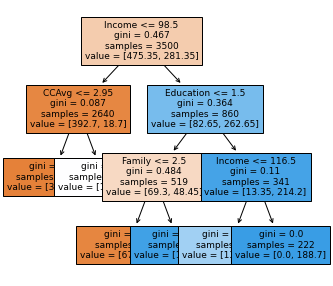

<IPython.core.display.Javascript object>

In [124]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* This model might be giving the simplest model less rules but a real buisness would not be able to use it to actually target the potential customers because there is less branch not to cover more possible rules.

In [125]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- weights: [7.35, 2.55] class: 0
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- weights: [4.35, 9.35] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [6.75, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- CCAvg <= 4.50
|   |   |   |   |--- weights: [0.00, 6.80] class: 1
|   |   |   |--- CCAvg >  4.50
|   |   |   |   |--- weights: [0.15, 0.00] class: 0
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 100.00
|   |   |   |   |--- CCAvg <= 4.20
|   |   |   |   |   |--- weights: [0.45, 0.00] class: 0
|   |   |   |   |--- CCAvg >  4.20
|   |   |   |   |   |--- weights: [0.00, 1.70] class: 1
|   |   |   |--- Income >  100.00
|   |   |   |   |--- Income <= 

<IPython.core.display.Javascript object>

**Creating model with 0.001 ccp_alpha**

In [126]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.001, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on the training set

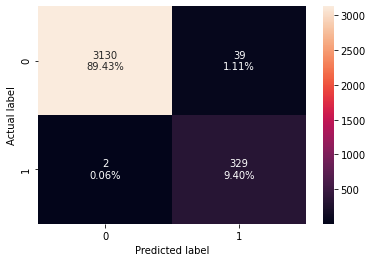

<IPython.core.display.Javascript object>

In [127]:
confusion_matrix_sklearn(best_model2, X_train, y_train)

In [128]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.9939577039274925


<IPython.core.display.Javascript object>

#### Checking performance on the test set

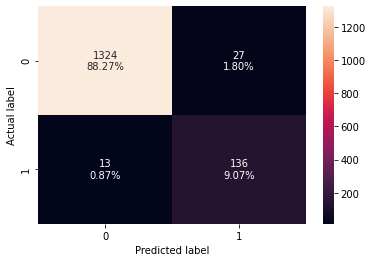

<IPython.core.display.Javascript object>

In [129]:
confusion_matrix_sklearn(best_model2, X_test, y_test)

In [130]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.912751677852349


<IPython.core.display.Javascript object>

* The results have improved from the initial model.
* Previous model recall rate was 0.96 for training set and 0.89 for test set improved model 0.99 and 0.91 respectively.
* The performance is comparable to the  hyperparameter tuned model.
* The model is giving a more generalized performance on training and test set.

### Visualizing the Decision Tree

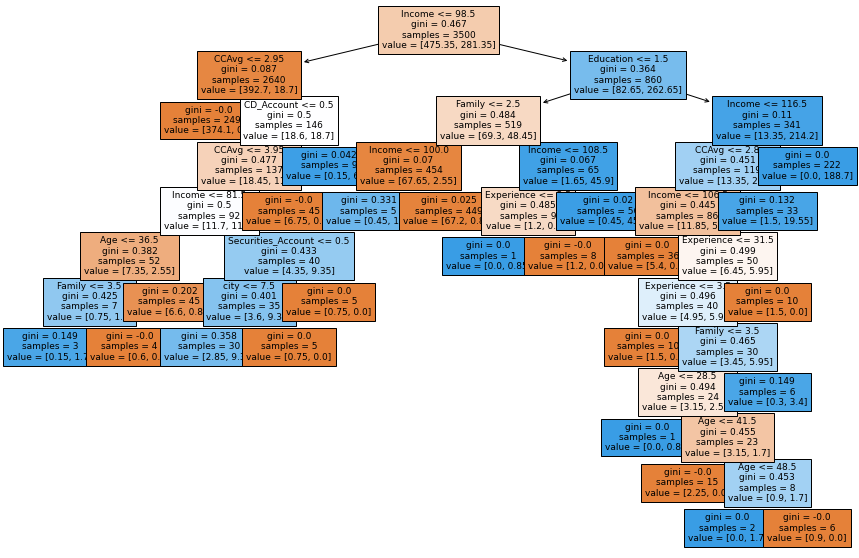

<IPython.core.display.Javascript object>

In [131]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

* There is more rules for model built by ccp_alpha=0.001 than best model ccp_alpha= 0.009
* Decision tree look more leaf and complex than best ccp_alpha= 0.009, but higher recall rate 0.99 which is perfect score for prediction.

In [132]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [374.10, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3.95
|   |   |   |   |--- Income <= 81.50
|   |   |   |   |   |--- weights: [7.35, 2.55] class: 0
|   |   |   |   |--- Income >  81.50
|   |   |   |   |   |--- weights: [4.35, 9.35] class: 1
|   |   |   |--- CCAvg >  3.95
|   |   |   |   |--- weights: [6.75, 0.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- CCAvg <= 4.50
|   |   |   |   |--- weights: [0.00, 6.80] class: 1
|   |   |   |--- CCAvg >  4.50
|   |   |   |   |--- weights: [0.15, 0.00] class: 0
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 100.00
|   |   |   |   |--- CCAvg <= 4.20
|   |   |   |   |   |--- weights: [0.45, 0.00] class: 0
|   |   |   |   |--- CCAvg >  4.20
|   |   |   |   |   |--- weights: [0.00, 1.70] class: 1
|   |   |   |--- Income >  100.00
|   |   |   |   |--- Income <= 

<IPython.core.display.Javascript object>

In [133]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.608917
Family              0.148910
Education           0.127994
CCAvg               0.077951
Age                 0.011920
CD_Account          0.011422
Experience          0.008277
city                0.002438
Securities_Account  0.002171
Mortgage            0.000000
Online              0.000000
CreditCard          0.000000


<IPython.core.display.Javascript object>

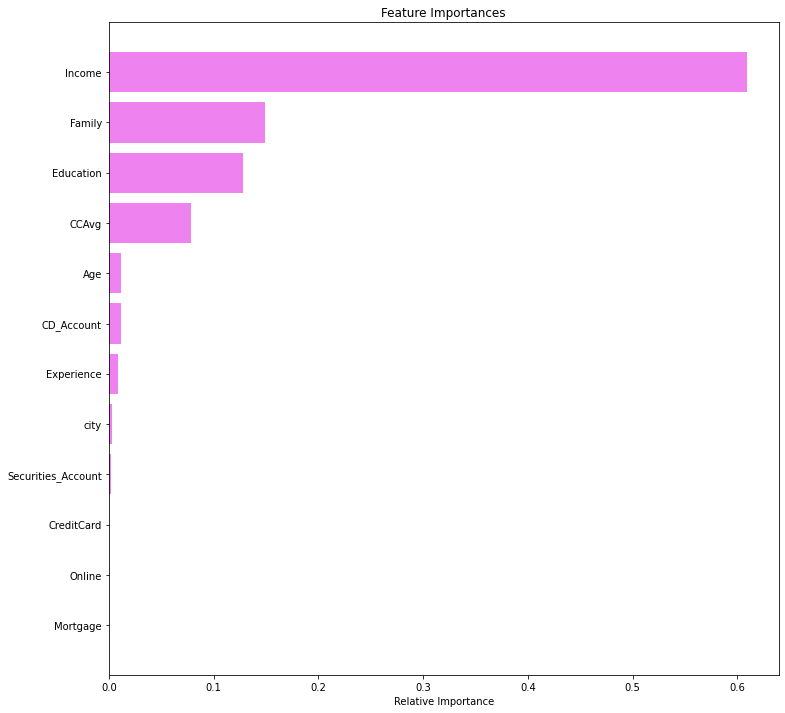

<IPython.core.display.Javascript object>

In [134]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income, Family, Education and CCAvg are the top 4 important features to predict customer Personal_Loan account.

### Comparing all the decision tree models

In [135]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Recall on training set
0,1.000000
1,0.966767
2,0.993958


<IPython.core.display.Javascript object>

In [136]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Recall on testing set
0,0.845638
1,0.892617
2,0.912752


<IPython.core.display.Javascript object>

* Decision tree model with pre-pruning has given the best recall score which is 1 on training dataset.
* The pre-pruned(0.96) and the post-pruned (0.99) models have reduced overfitting and the model is getting improved performance

### Predicting Costumers

In [152]:
# Extracting the rows from original data frame df where indexes are same as the training data
original_df = data[data3.index.isin(X_train.index.values)].copy()

# Extracting predicted values from the best recall final model
fitted_values = best_model2.predict(X_train)

# Add new columns for predicted values
original_df["Predicted_Personal_Loan_Costumer"] = fitted_values

# Let us look at the top 50 predictions where our model made highest extimation errors (on train data)
original_df.head(200)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Predicted_Personal_Loan_Costumer
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1,0
8,9,35,10,81,90089,3,0.60,2,104,0,0,0,1,0,0
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0,0
10,11,65,39,105,94710,4,2.40,3,0,0,0,0,0,0,0
14,15,67,41,112,91741,1,2.00,1,0,0,1,0,0,0,0
15,16,60,30,22,95054,1,1.50,3,0,0,0,0,1,1,0


<IPython.core.display.Javascript object>

### Conclusions

- We analyzed the "Bank Costumers Opening Personal Loan account" using different techniques and used Decision Tree Classifier to build a predictive model for the same.
- The model built can be used to predict if a customer is going to open Personal Loan Acoount or not. our post pruning model have 99% recall rate is higly efficient to predict target costumer.
- We visualized different trees and their confusion matrix to get a better understanding of the model. 
- * Income, Family, Education and CCAvg are the top 4 important features to predict that customer will open Personal_Loan account.
- We saw how importance of hyper-parameters to reduce overfitting in our model.

### Recommendations

* According to the decision tree model - 

    a) If a customer have more than 116K income, family size more than 3 member, credit card spending more than 3K, and older than 36 and have CD_account is more likely to open Personal Loan account


* It is observed that 40.3 % of the costumers have *NO Online Banking Account**. About % 45 of costumer who have the *Personal_Loan** are also *Online** account holders, so having *Online** account seems  affecting significantly to increase *Personal_Loan** account. So, we would offer more online banking service to costumer and improve online banking service.

* It is observed tha Majority, about % 70 of the costumer don't have *CreditCard** account. And about % 29 of the *Personal_Loan** costumers are also *CreditCard** account holders, so having *CreditCard** account looks like positivley affecting to increase *Personal_Loan** account. 

* So, Credit card spending is positively affecting to costumer to open personal account, bank can start a campanign for opening credit card account to increase personal loan account.

* It is observed that 10 Cities where More than 100 costumer's residential address is located are *Los Angeles, Berkeley, San Francisco, San Diego, Santa Barbara, Stanford, Sacramento, Davis, La Jolla, Palo Alto. So, Marketing Team would target this city for campaign to increase *Personal_Loan** account, because there would be more people who is familiar with the bank in those locations, but, on the other hand, city or zipcodes has *NO** significant positive correlation with opening *Personal_Loan** aacount.


* It is observed that Costumers who have more family members seems more effective to open *Personal_Loan** account.Bank would provide some family package to costumer when they campaign. For example Family Member programs initiatives like special discounts, bonus points, rewards money, extra features for members etc can be provided by the bank.

* It is observed that bank customers have income around *75K**/year avaeragly. and Costumers who have more `Income` are more highly to open *Personal_Loan** account. So, bank can canpaign to target high income costumers by some incentive programs.
